<a href="https://colab.research.google.com/github/jvalbuena/ML-notebooks/blob/main/Hackathon_BTTF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Goal:**
The goal of the problem is to predict whether a passenger was satisfied or not considering his/her overall experience of travelling on the Shinkansen Bullet Train.

**Dataset:**

The problem consists of 2 separate datasets: Travel data & Survey data. Travel data has information related to passengers and attributes related to the Shinkansen train, in which they travelled. The survey data is aggregated data of surveys indicating the post-service experience. You are expected to treat both these datasets as raw data and perform any necessary data cleaning/validation steps as required.

The data has been split into two groups and provided in the Dataset folder. The folder contains both train and test data separately.

Train_Data
Test_Data

**Target Variable:** Overall_Experience (1 represents ‘satisfied’, and 0 represents ‘not satisfied’)

The training set can be used to build your machine-learning model. The training set has labels for the target column - Overall_Experience.

The testing set should be used to see how well your model performs on unseen data. For the test set, it is expected to predict the ‘Overall_Experience’ level for each participant.

**Data Dictionary:**

All the data is self-explanatory. The survey levels are explained in the Data Dictionary file.

Submission File Format: You will need to submit a CSV file with exactly 35,602 entries plus a header row. The file should have exactly two columns

ID
Overall_Experience (contains 0 & 1 values, 1 represents ‘Satisfied’, and 0 represents ‘Not Satisfied’)

**Evaluation Criteria:**

Accuracy Score: The evaluation metric is simply the percentage of predictions made by the model that turned out to be correct. This is also called the accuracy of the model. It will be calculated as the total number of correct predictions (True Positives + True Negatives) divided by the total number of observations in the dataset.

In other words, the best possible accuracy is 100% (or 1), and the worst possible accuracy 0%.

## Importing necessary libraries and data

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# Code to ignore warnings from function usage
import warnings;
warnings.filterwarnings('ignore')

# Load sklearn libraries for modeling
from sklearn.tree import DecisionTreeClassifier

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
# from sklearn.impute import SimpleImputer

# To get diferent metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Data Overview

- Observations
- Sanity checks

### **Mount the drive and load the dataset**



In [ ]:
# Mount content drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read different datasets into variables
tr_train = pd.read_csv("/content/drive/MyDrive/Python Course/Hackathon/Traveldata_train.csv")
tr_test = pd.read_csv("/content/drive/MyDrive/Python Course/Hackathon/Traveldata_test.csv")
sr_train = pd.read_csv("/content/drive/MyDrive/Python Course/Hackathon/Surveydata_train.csv")
sr_test = pd.read_csv("/content/drive/MyDrive/Python Course/Hackathon/Surveydata_test.csv")

In [ ]:
# Copying dataset to another variable to keep the original data intact
# tr_train_bk = tr_train.copy()

In [ ]:
# Listing the first 5 rows on the dataset
tr_train.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [ ]:
sr_train.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [ ]:
# Listing the last 5 rows on the dataset
tr_train.tail()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
94374,98894375,Male,Loyal Customer,32.0,Business Travel,Business,1357,83.0,125.0
94375,98894376,Male,Loyal Customer,44.0,Business Travel,Business,592,5.0,11.0
94376,98894377,Male,NaN,63.0,Business Travel,Business,2794,0.0,0.0
94377,98894378,Male,Loyal Customer,16.0,Personal Travel,Eco,2744,0.0,0.0
94378,98894379,Male,Loyal Customer,54.0,NaN,Eco,2107,28.0,28.0


In [ ]:
tr_test.tail()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
35597,99935598,Male,Loyal Customer,8.0,Personal Travel,Eco,1334,0.0,0.0
35598,99935599,Female,Loyal Customer,53.0,Business Travel,Business,1772,0.0,0.0
35599,99935600,Male,Disloyal Customer,22.0,Business Travel,Eco,1180,0.0,0.0
35600,99935601,Female,Loyal Customer,67.0,Personal Travel,Eco,420,23.0,16.0
35601,99935602,Male,NaN,20.0,Personal Travel,Eco,1680,0.0,0.0


In [ ]:
sr_train.tail()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
94374,98894375,0,Poor,Ordinary,Good,Good,Convenient,Poor,Poor,Poor,Poor,Good,Good,Good,Needs Improvement,Good,Poor
94375,98894376,1,Good,Ordinary,Good,Good,Convenient,Needs Improvement,Excellent,Excellent,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Good
94376,98894377,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Acceptable,Good,Acceptable
94377,98894378,0,Needs Improvement,Ordinary,NaN,Needs Improvement,Convenient,Good,Needs Improvement,Good,Good,Acceptable,Good,Good,Good,Excellent,Good
94378,98894379,0,Acceptable,Ordinary,Poor,Acceptable,Manageable,Acceptable,Acceptable,Acceptable,Acceptable,Poor,Good,Good,Poor,Good,Acceptable


In [ ]:
sr_test.tail()

,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
35597,99935598,Needs Improvement,Green Car,Excellent,Needs Improvement,Manageable,Acceptable,Needs Improvement,Acceptable,Acceptable,Good,Excellent,Good,Acceptable,Good,Acceptable
35598,99935599,Needs Improvement,Ordinary,Needs Improvement,Good,Needs Improvement,Acceptable,Excellent,Excellent,Good,Good,Good,Good,Acceptable,Good,Good
35599,99935600,Good,Green Car,Extremely Poor,Good,Needs Improvement,Needs Improvement,Good,Poor,Needs Improvement,Poor,Acceptable,Poor,Poor,Excellent,Needs Improvement
35600,99935601,Excellent,Ordinary,Excellent,Excellent,Inconvenient,Acceptable,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Acceptable,Excellent,Good
35601,99935602,Good,Ordinary,Acceptable,Good,Manageable,Poor,Good,Poor,Poor,Acceptable,Good,Good,Needs Improvement,Good,Poor


### **Checking the info, nulls and duplicate rows in the dataset**


In [ ]:
# Let us see the info of the data
tr_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


In [ ]:
sr_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

In [ ]:
# Checking for any missing values just in case
sr_train.isnull().sum()

ID                            0
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
dtype: int64

In [ ]:
# Checking for any missing values just in case
tr_train.isnull().sum()

ID                            0
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
dtype: int64

In [ ]:
# Check for duplicates
tr_train.duplicated().sum()

0

In [ ]:
# Check for duplicates
sr_train.duplicated().sum()

0

In [ ]:
df_train = tr_train.merge(sr_train, on='ID', how='inner')

In [ ]:
# Creating the test dataset
df_test = tr_test.merge(sr_test, on='ID', how='inner')

In [ ]:
df_train.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,...,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,...,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,...,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,...,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [ ]:
df_test.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0,Acceptable,...,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,99900002,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0,Extremely Poor,...,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,99900003,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0,Excellent,...,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0,Acceptable,...,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,99900005,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0,Excellent,...,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent


In [ ]:
columns_df_train = set(df_train.columns)
columns_df_test = set(df_test.columns)

# Find the difference between the two sets
diff_df1_df2 = columns_df_train - columns_df_test
diff_df2_df1 = columns_df_test - columns_df_train

print("Columns in df1 but not in df2: ", diff_df1_df2)
print("Columns in df2 but not in df1: ", diff_df2_df1)

Columns in df1 but not in df2:  {'Overall_Experience'}
Columns in df2 but not in df1:  set()


In [ ]:
df_train['Overall_Experience'].mean()

0.5466576251072802

**Observations:**

- There are some **null** values in the dataset
- There are no duplicated rows.
- There are 5 numerical columns and 10 Object columns in the dataset, object columns are likely categorical.






### **Checking the shape and row count in the dataset**


In [ ]:
# Checking rows and columns in the dataset
df_train.shape

(94379, 25)

In [ ]:
df_test.shape

(35602, 24)

In [ ]:
# Keep total row count in row_count variable as it may be handy in the future
row_count = len(df_train)
print(row_count)

94379


In [ ]:
# 'ID' is likely to not provide any value, we'll verify by counting unique values
df_train['ID'].nunique()

94379

**Observations:**

- There are 4612 rows and 15 columns in the original dataset.

- ID colum entries are unique, we can now drop `ID` column as it will bring no value to our investigation

### **Splitting Columns between Categorical and Numerical**


In [ ]:
# Extracting numerical variables into array
num_cols= []
for column in df_train.columns:
    if df_train[column].dtype in ['int64', 'float64']:
        num_cols.append(column)
print(num_cols)


# Extracting categorical variables into array
cat_cols= list(df_train.select_dtypes("object").columns)
print(cat_cols)

['ID', 'Age', 'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins', 'Overall_Experience']
['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class', 'Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 'Catering', 'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding']


**OBSERVATIONS:**

* There are 4612 rows in the dataset.
* non-null object count is zero meaning we can be confident no missing data treatment is required.
* As we can see above, the `status` variable (the target variable) is of the **int64** but **categorical** in nature, all the other predictor variables here are either **numerical** have **int64** and **float64** datatypes or **categorical** as datatype is **object**.
* So this is a **classification problem where the original feature set uses numerical and object features.**.
* The above table also confirms what we found earlier, that there are 4612 rows and 15 columns in the original dataset. Since every column here has the same number of non-null values, we can also conclude that **there is no missing data in the table** (due to the high quality of the data source), and we can proceed without needing to worry about missing value imputation techniques.


**INDEPENDENT VARIABLES**

* Object columns ID, current_occupation, first_interaction, profile_completed, last_activity, print_media_type1, print_media_type2, digital_media, educational_channels, referral
* Numerical columns are age, website_visits, time_spent_on_website, page_views_per_visit

**DEPENDENT VARIABLES**

* status is our dependent variable.
* **ID is an identifier** which is unique for each potential lead and **we can drop this column** as it would not add any value to our analysis.
* We can confirm the continuous and categorical columns in the data by looking at the unique value counts.
* There are no duplicates in dataset.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

### **Univariate Analysis - Numerical Variables**

In [ ]:
# Describe statistical summary of columns in Dataset
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,94379.0,9.884719e+07,27245.014865,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Age,94346.0,3.941965e+01,15.116632,7.0,27.0,40.0,51.0,85.0
Travel_Distance,94379.0,1.978888e+03,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,94322.0,1.464709e+01,38.138781,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94022.0,1.500522e+01,38.439409,0.0,0.0,0.0,13.0,1584.0
Overall_Experience,94379.0,5.466576e-01,0.497821,0.0,0.0,1.0,1.0,1.0


In [ ]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,35602.0,9.991780e+07,10277.556478,99900001.0,99908901.25,99917801.5,99926701.75,99935602.0
Age,35591.0,3.944700e+01,15.137554,7.0,27.00,40.0,51.00,85.0
Travel_Distance,35602.0,1.987152e+03,1024.308863,50.0,1360.00,1929.0,2559.00,6868.0
Departure_Delay_in_Mins,35573.0,1.488070e+01,37.895453,0.0,0.00,0.0,13.00,978.0
Arrival_Delay_in_Mins,35479.0,1.530880e+01,38.531293,0.0,0.00,0.0,13.00,970.0


**Observations:**

- Customers **age** ranges from 7 to 85 years meaning our potential customers are adults, our average lead's age is 39 years old.
- Median travel distance 1923, to a max of 6951
- Departure delay of 12 min for the 75% and 1592 for the max
- Arrival delay of 13 and 1584 - gotta understand distribution

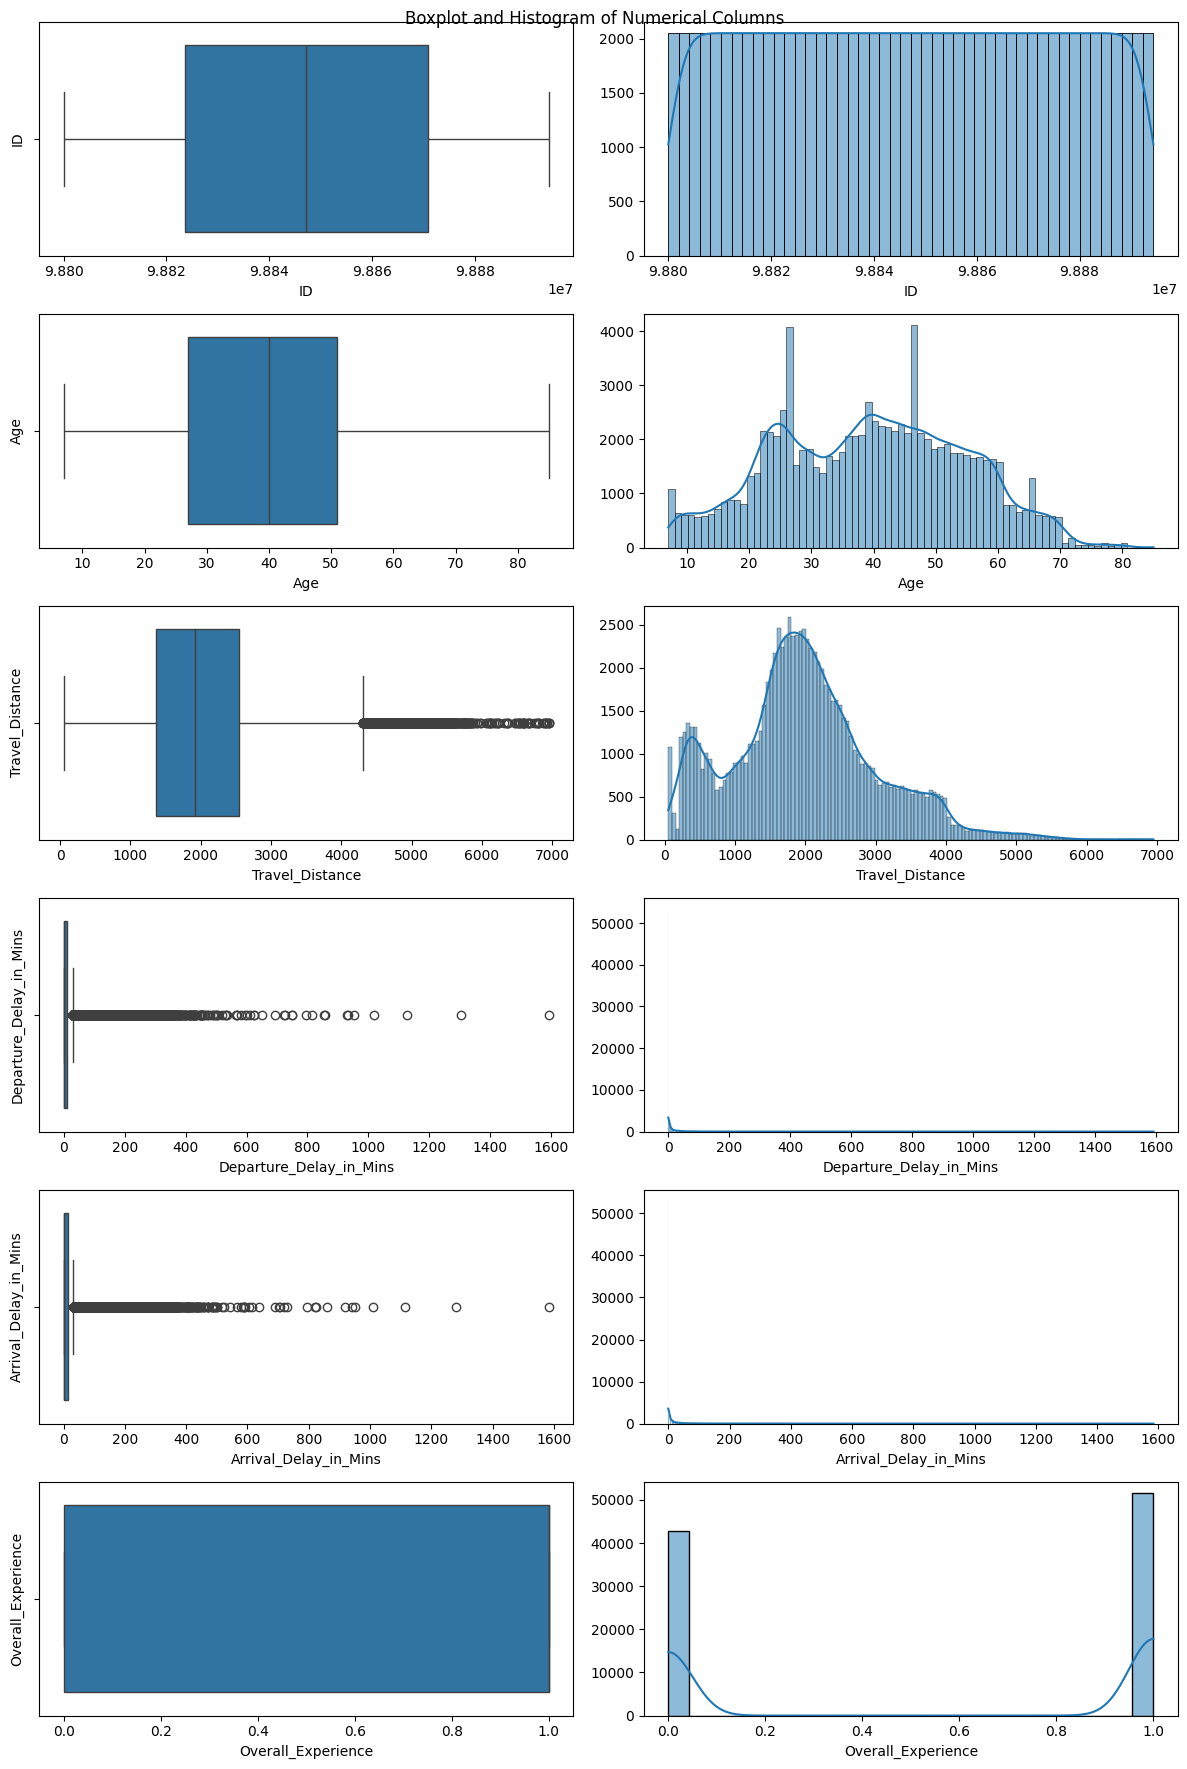

In [ ]:
# Select numerical variables, exclude 'status'
numerical_cols = df_train.select_dtypes(include='number')
# numerical_cols.drop('status', axis=1, inplace=True)

# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(numerical_cols.columns), ncols=2, figsize=(12, 3 * len(numerical_cols.columns)))

# Iterate over each numerical column and create a boxplot and histogram side by side
for i, col in enumerate(numerical_cols.columns):
    # Boxplot
    ax_boxplot = sns.boxplot(x=numerical_cols[col], ax=axes[i, 0])
    ax_boxplot.set_ylabel(col)

    # Histogram
    ax_hist = sns.histplot(x=numerical_cols[col], ax=axes[i, 1], kde=True)
    ax_hist.set_ylabel('')

# Set the title
plt.suptitle('Boxplot and Histogram of Numerical Columns')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the boxplot and histogram
plt.show()

**Observations:**

- Age is skewed right, with median age being 51 year old.
- `Website visits` and `page_views_per_visit` have a significant number of outliers these metrics are usually related to content engagement, so it will be interesting to see if paid members have a correlation to either variable.
-  `Time_spent_on_website` is right skewed.

### **Univariate Analysis - Categorical Variables**

In [ ]:
# Printing the % subcategories of each category
for i in cat_cols:
    print(df_train[i].value_counts(normalize=True))
    print('*'*40)

Female    0.507041
Male      0.492959
Name: Gender, dtype: float64
****************************************
Loyal Customer       0.817332
Disloyal Customer    0.182668
Name: Customer_Type, dtype: float64
****************************************
Business Travel    0.688373
Personal Travel    0.311627
Name: Type_Travel, dtype: float64
****************************************
Eco         0.522807
Business    0.477193
Name: Travel_Class, dtype: float64
****************************************
Acceptable           0.224326
Needs Improvement    0.222079
Good                 0.218357
Poor                 0.160998
Excellent            0.137524
Extremely Poor       0.036716
Name: Seat_Comfort, dtype: float64
****************************************
Green Car    0.502601
Ordinary     0.497399
Name: Seat_Class, dtype: float64
****************************************
Good                 0.229072
Excellent            0.206954
Acceptable           0.177615
Needs Improvement    0.175426
Poor        

**Observations:**
- Potential customer base is mostly Professional ~56%, followed by Unemployed ~31% and Students 12%
- Customer first interaction is led by website 55%, remaining 45% is mobile driven
- Great majority of customer have High to Medium profile completion level, we expect profile completion to help drive paid membership.
- Nearly half of the customers last activity was carried via email followed by phone 26% and website 23%
- Interaction via digital channels is mainly driven by Website ~55% and Mobile App which bring ~45% of activity.
- In terms of channels driving new leads:
  - 10% of total leads came from newspaper.
  - About 5% of the total leads come from Magazines.
  - About 11% of the total leads came from digital platforms.
  - About 15% of leads came from online forums, discussion threads, educational websites, etc.
  - About 2% of leads originated from referrals.
- Dataset's **lead conversion rate** is 29.8%


### **Bi-variate Analysis - Categorical Variables**

In [ ]:
# This code will create a normalised crosstab of each categorical colum vs status:
for i in cat_cols:
    if i!='status':
        a = (pd.crosstab(df_train[i],df_train['Overall_Experience'],normalize='index')*100)
        print(a)
        print('*'*40)

Overall_Experience          0          1
Gender                                  
Female              34.792429  65.207571
Male                56.168391  43.831609
****************************************
Overall_Experience          0          1
Customer_Type                           
Disloyal Customer   76.058955  23.941045
Loyal Customer      38.374175  61.625825
****************************************
Overall_Experience          0          1
Type_Travel                             
Business Travel     41.696095  58.303905
Personal Travel     53.357703  46.642297
****************************************
Overall_Experience          0          1
Travel_Class                            
Business            29.180452  70.819548
Eco                 60.078635  39.921365
****************************************
Overall_Experience          0          1
Seat_Comfort                            
Acceptable          64.604405  35.395595
Excellent            0.740113  99.259887
Extremely Poor  

**Observations:**

- 35% of professionals are paid members, followed by 26.6% of the Unemployed and 11.7% of the students are paid members.
- 45% of the paid members use the website compared to 10% using the mobile app.
- 41% of high profile completion leads are paid members, compared to 18% of Medium profile completion.
- Lead's `last_activity` 38.4% website leads last activity came through the website, followed by 30.3% via email and 21.3% via Phone.
- Newspaper adds do not have large influence on lead conversion.
- Magazine adds do not have large influence on lead conversion.
- Digital media do not have large influence on lead conversion.
- Online forums, discussion threads and educational websites do not have large influence on lead conversion.
- Referrals do have a large influence on lead conversion as about 67% of referrals are paid members.

### **Bivariate analysis for numerical variables**

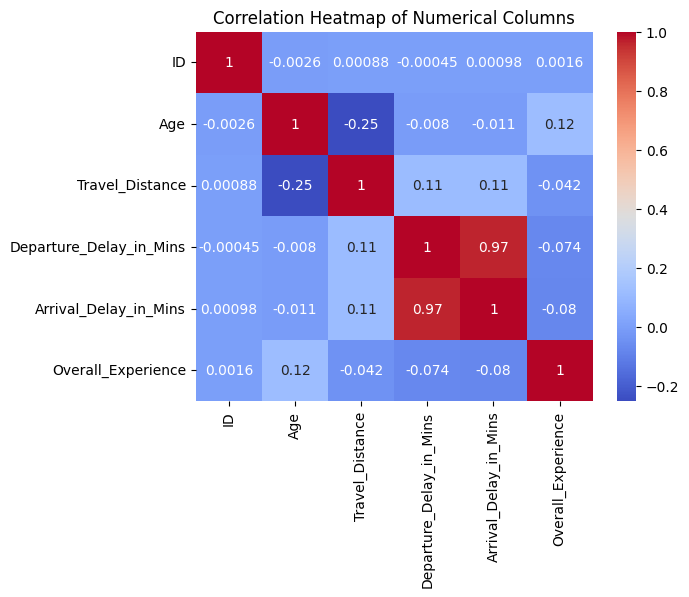

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is called 'df' and contains numerical columns
numerical_cols = df_train.select_dtypes(include='number')

# Create a correlation matrix
correlation_matrix = numerical_cols.corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set the title
plt.title('Correlation Heatmap of Numerical Columns')

# Display the heatmap
plt.show()

In [ ]:
# Mean of numerical variables grouped by attrition
df_train.groupby(['Overall_Experience'])[num_cols].mean()

,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience
Overall_Experience,,,,,,
0,9.884714e+07,37.49018,2025.826088,17.738600,18.392374,0.0
1,9.884723e+07,41.01968,1939.962650,12.083107,12.196763,1.0


**Observations:**

- From the table above `time_spent_on_website` has the greater correlation to paid membership status being set than any of the remaining numerical variables.

### **Bivariate analysis for numerical variables - Chi-Squared and p-values**

In [ ]:
# Defining a function to calculate chi2 and p-value to establish association strenght between variables
import pandas as pd
from scipy.stats import chi2_contingency

def calculate_chi_square(column1, column2):
    observed = pd.crosstab(column1, column2)
    chi2, p, dof, expected = chi2_contingency(observed)
    return chi2, p

******************************************
Gender
Chi-square statistic: 4345.155166064929
P-value: 0.0


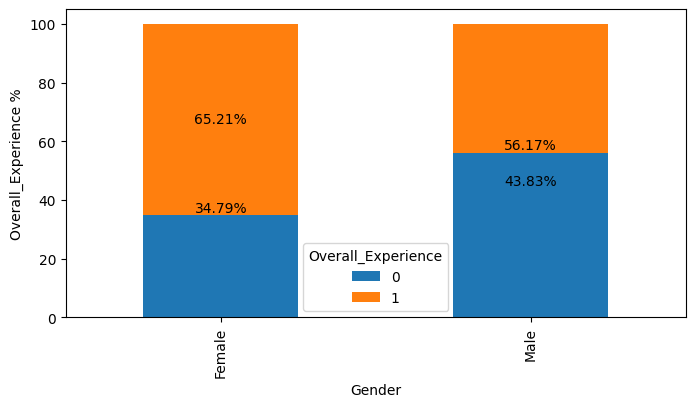

******************************************
Customer_Type
Chi-square statistic: 7309.499724788133
P-value: 0.0


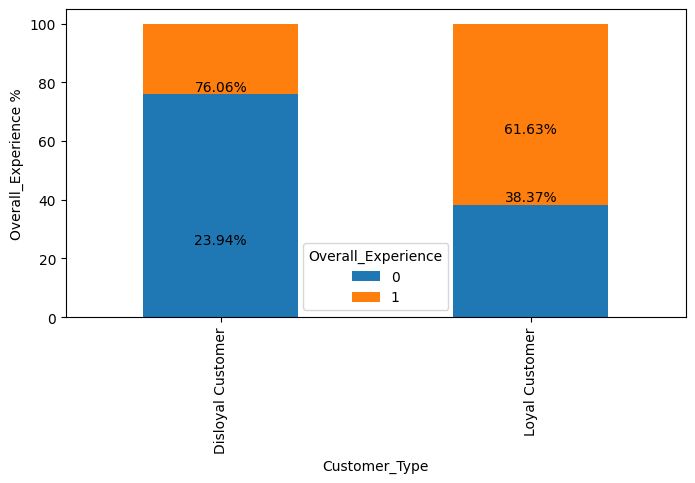

******************************************
Type_Travel
Chi-square statistic: 1001.9290760272193
P-value: 6.8384031558953414e-220


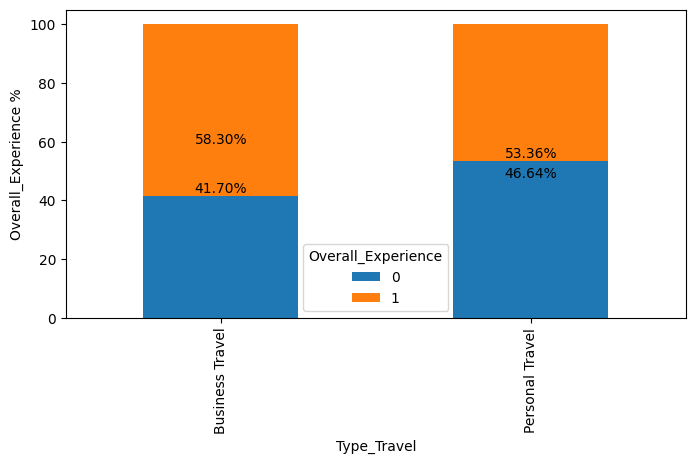

******************************************
Travel_Class
Chi-square statistic: 9069.331907162315
P-value: 0.0


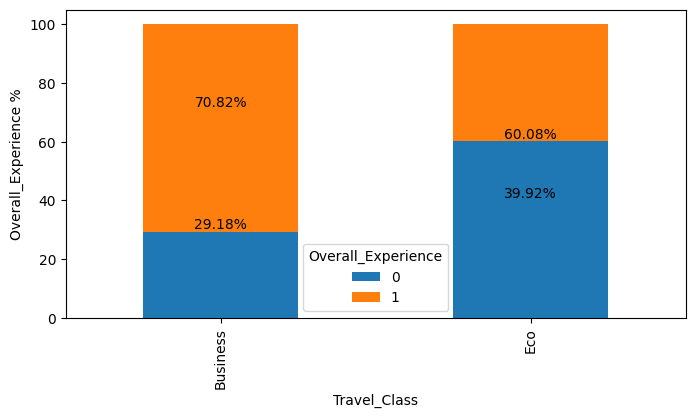

******************************************
Seat_Comfort
Chi-square statistic: 20928.165610994638
P-value: 0.0


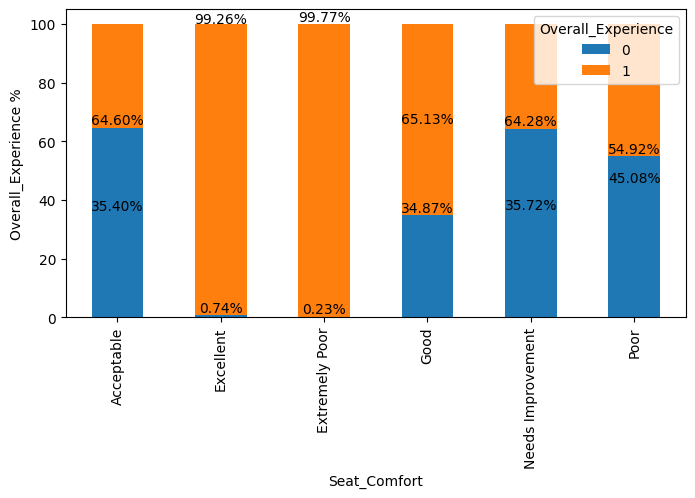

******************************************
Seat_Class
Chi-square statistic: 0.8331249760545094
P-value: 0.3613704633310514


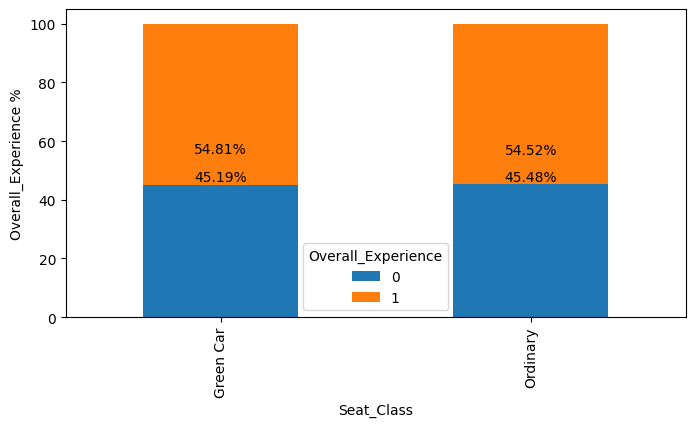

******************************************
Arrival_Time_Convenient
Chi-square statistic: 153.6851440431816
P-value: 2.1923572518818413e-31


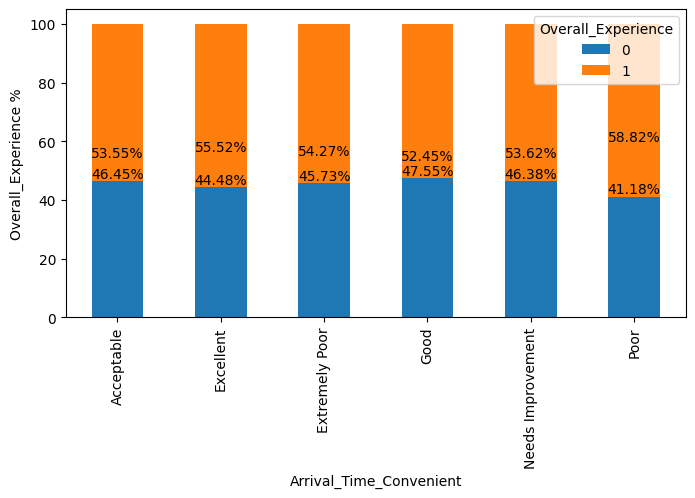

******************************************
Catering
Chi-square statistic: 6041.482999308822
P-value: 0.0


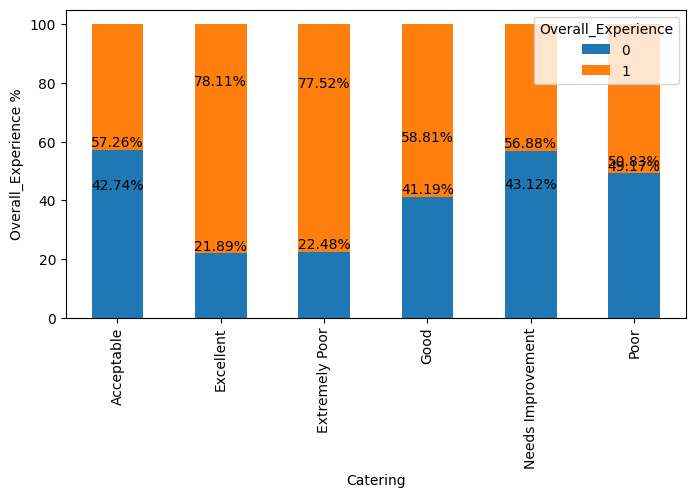

******************************************
Platform_Location
Chi-square statistic: 1875.5696961347896
P-value: 0.0


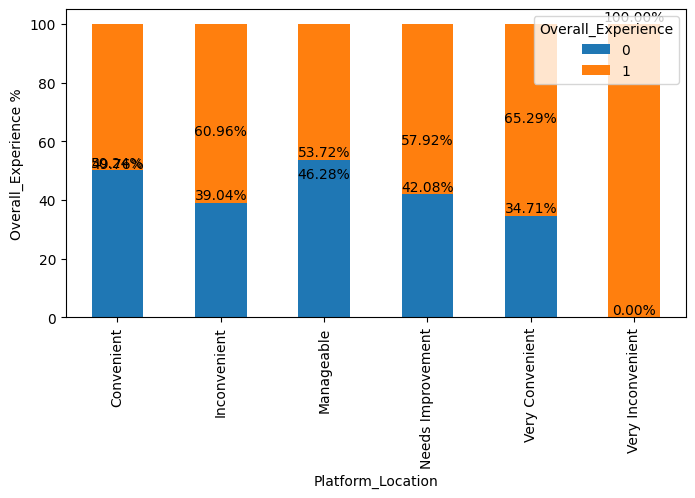

******************************************
Onboard_Wifi_Service
Chi-square statistic: 5796.846058532063
P-value: 0.0


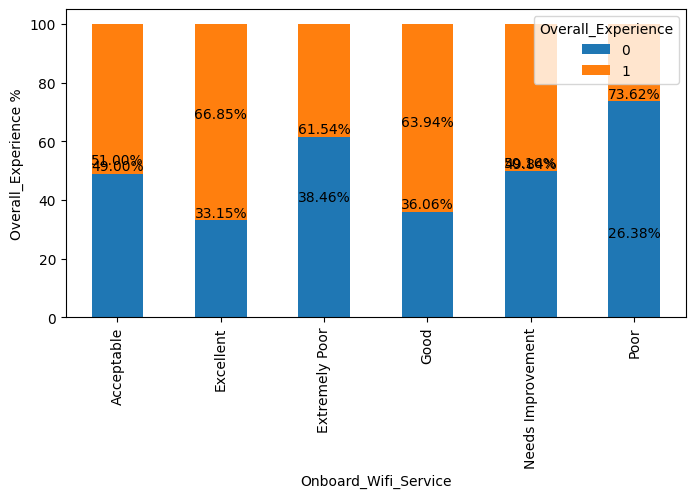

******************************************
Onboard_Entertainment
Chi-square statistic: 38715.854518589214
P-value: 0.0


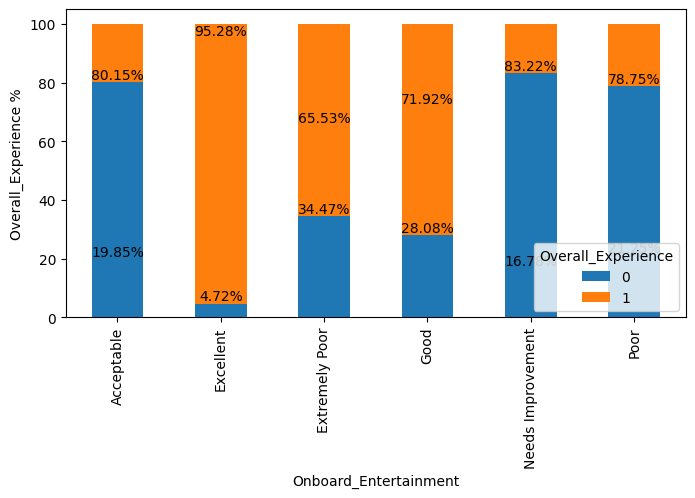

******************************************
Online_Support
Chi-square statistic: 17841.094649252474
P-value: 0.0


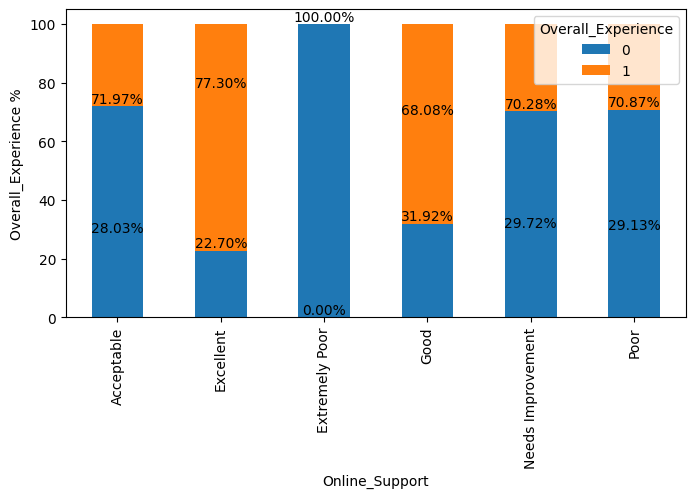

******************************************
Ease_of_Online_Booking
Chi-square statistic: 19566.651544249486
P-value: 0.0


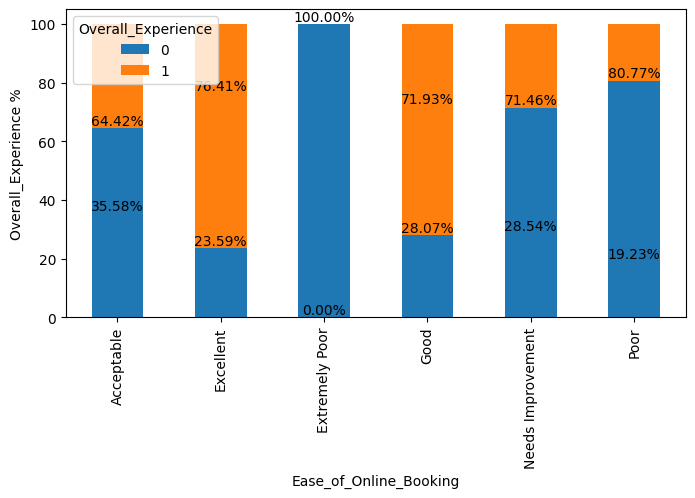

******************************************
Onboard_Service
Chi-square statistic: 11323.701590339566
P-value: 0.0


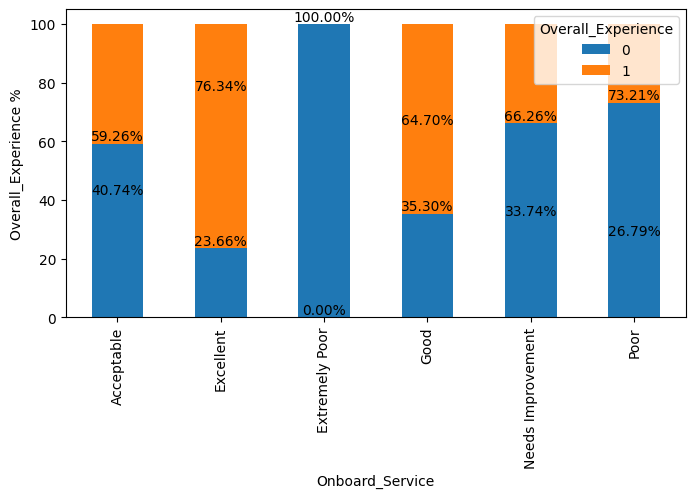

******************************************
Legroom
Chi-square statistic: 10539.117380107073
P-value: 0.0


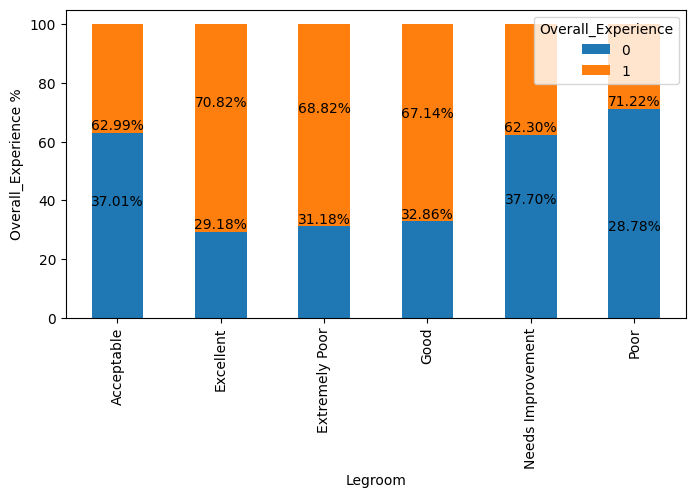

******************************************
Baggage_Handling
Chi-square statistic: 9003.758835240851
P-value: 0.0


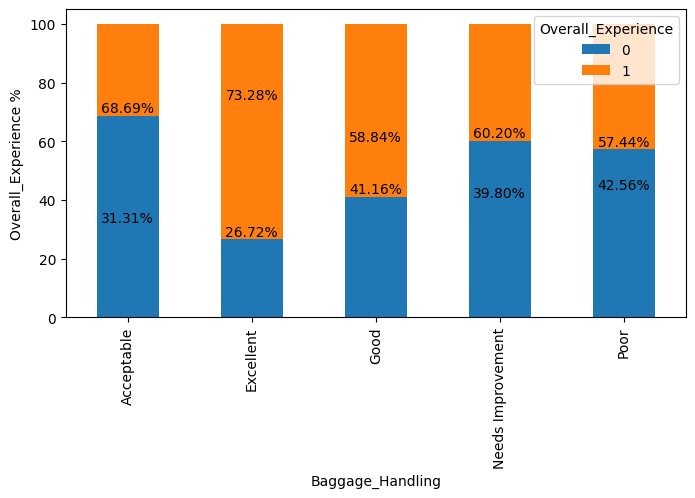

******************************************
CheckIn_Service
Chi-square statistic: 7270.432594696558
P-value: 0.0


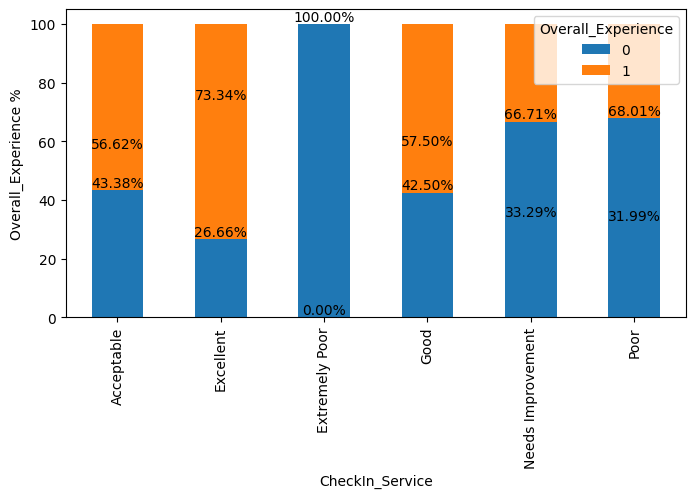

******************************************
Cleanliness
Chi-square statistic: 8554.969812109206
P-value: 0.0


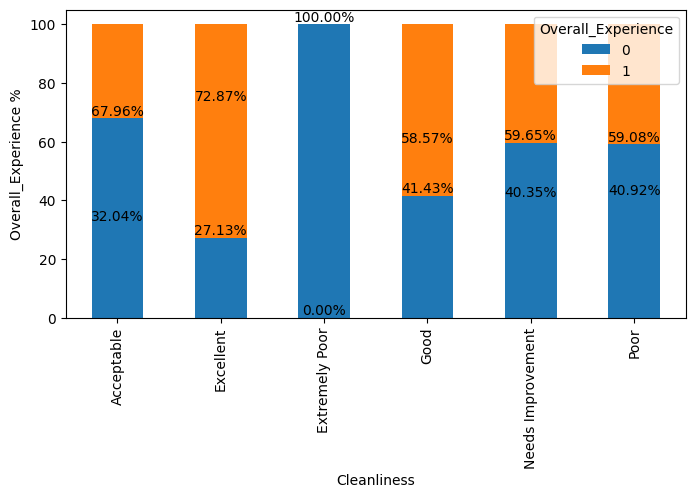

******************************************
Online_Boarding
Chi-square statistic: 11656.345982345078
P-value: 0.0


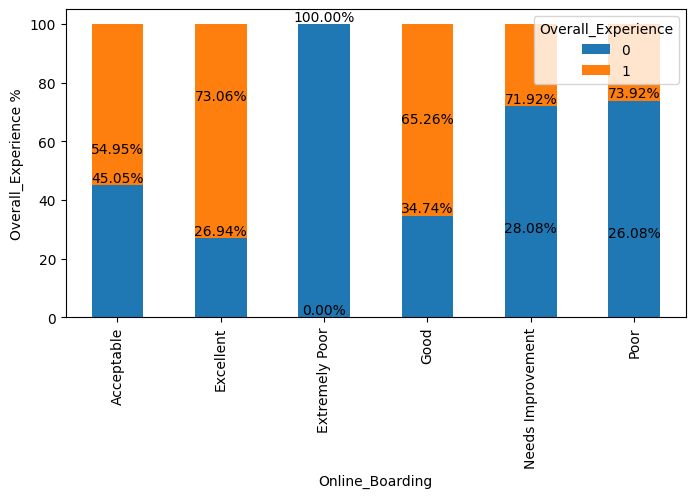

In [ ]:
# Calculating chi-square and P-values for categorical variables vs. 'status' variable as well as normalizing each categorical variable versus 'status'
for i in cat_cols:
    if i != 'Overall_Experience':
        crosstab_data = (pd.crosstab(df_train[i], df_train['Overall_Experience'], normalize='index') * 100)
        ax = crosstab_data.plot(kind='bar', figsize=(8, 4), stacked=True)
        chi2_stat, p_value = calculate_chi_square(df_train[i], df_train['Overall_Experience'])
        print('*' * 42)
        print(i)
        print("Chi-square statistic:", chi2_stat)
        print("P-value:", p_value)
        plt.ylabel('Overall_Experience %')

        # Add labels to the bars
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

        plt.show()

### **Departure Delay Vs. Overal Experience**

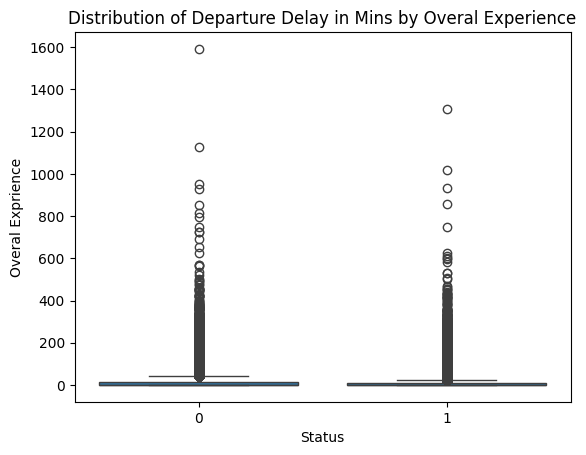

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot
sns.boxplot(x='Overall_Experience', y='Departure_Delay_in_Mins', data=df_train)
plt.xlabel('Status')
plt.ylabel('Overal Exprience')
plt.title('Distribution of Departure Delay in Mins by Overal Experience')
plt.show()

### **Age Vs. Overall Experience**

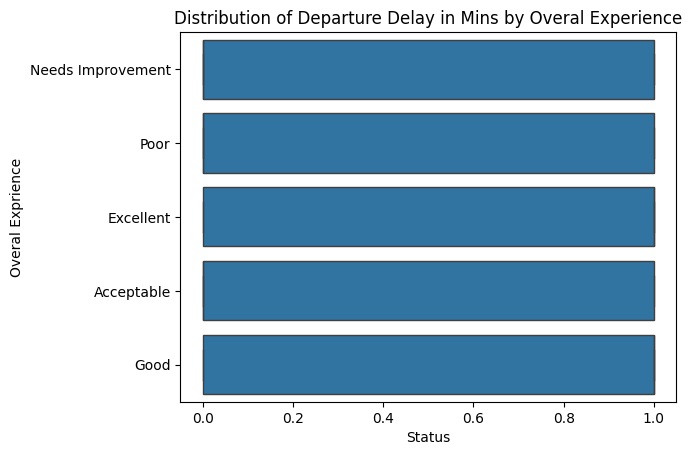

In [ ]:
# Create a box plot
sns.boxplot(x='Overall_Experience', y='Baggage_Handling', data=df_train)
plt.xlabel('Status')
plt.ylabel('Overal Exprience')
plt.title('Distribution of Departure Delay in Mins by Overal Experience')
plt.show()

**Observations:**

- From chi-squared and P-value results the below categorical variables have a significant association with the 'status' variable.

  * current_occupation
  * first_interaction
  * profile_completed
  * last_activity
  * referral


- Professionals and Unemployed are more likely to convert to paid customers 35% and 26% than students with only 11.7% conversion.
- Lead's first interaction via *website* are more likely to convert to paid customers 45% vs. 10% from *Mobile App*
- Customers with the highest profile completion have a conversion rate of 42% compared to 18% and 7% for medium and low completion rates.
- Referred customers are highly likely to convert to paid customers, this makes sense as referals are powerful means of conversion.
- Other variables such as last_activity, print_media_type1, print_media_type2, digital_media, ane educational channels do not contribute greatly to paid customer convertion.
- It is clear that `time_spent_on_website` is a strong indicator of a lead becomming a paid member, also the distribution for `age`  indicatex older leads are more likely to convert to paid customers.


**Answers to questions**

1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.

  Professionals and Unemployed are more likely to convert to paid customers 35% and 26% than students with only 11.7% conversion percentaje, this makes sense as up-skilling and re-skilling needs amongst professionals and unemployed leads are likely higher than students

2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?

  Leas using website have a 45.6% conversion percentaje, which is much higher than Mobile which only produces a 10.5% conversion percentaje.

3. The company uses multiple modes to interact with prospects. Which way of interaction works best?

  A: Customers using livechat and updating their profile data via the website have a 38.4% conversion rate, followed by Email enquires 30% and lastly by Phone activity which produces a 21.3% conversion, so the fact that a customer enquires via available means can be considered as a driving factor in becomming a paid customer.

4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?

  The most effective channel in terms of converted leads is referrals, which leads to 67.7% conversion rate when compared to other such as newspapers, magazines, digital platforms wich yield between 27.9% to 32% conversion.

5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

  Profile completion does increase chances of conversion, High completion level  yields a 41.8% paid membership followed by Medium completion wigth 18.9% and low completion level with a 7.5% paid membership.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
# Checking for any missing values just in case
df_train.isnull().sum()

ID                            0
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
dtype: int64

In [ ]:
df_test.isnull().sum()

ID                            0
Gender                       30
Customer_Type              3383
Age                          11
Type_Travel                3448
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      29
Arrival_Delay_in_Mins       123
Seat_Comfort                 22
Seat_Class                    0
Arrival_Time_Convenient    3325
Catering                   3357
Platform_Location            12
Onboard_Wifi_Service         12
Onboard_Entertainment         8
Online_Support               26
Ease_of_Online_Booking       18
Onboard_Service            2872
Legroom                      25
Baggage_Handling             40
CheckIn_Service              22
Cleanliness                   2
Online_Boarding               2
dtype: int64

**Observations:**
- There are some missing values, leaving untreated for now.

**Observations:**

- At this stage, duplicates can be safely ignored as we have dropped the `ID` column which did not contribute to predicting our target variable.

In [ ]:
# Check for unique value count, particularly
df_train.nunique()

ID                         94379
Gender                         2
Customer_Type                  2
Age                           75
Type_Travel                    2
Travel_Class                   2
Travel_Distance             5210
Departure_Delay_in_Mins      437
Arrival_Delay_in_Mins        434
Overall_Experience             2
Seat_Comfort                   6
Seat_Class                     2
Arrival_Time_Convenient        6
Catering                       6
Platform_Location              6
Onboard_Wifi_Service           6
Onboard_Entertainment          6
Online_Support                 6
Ease_of_Online_Booking         6
Onboard_Service                6
Legroom                        6
Baggage_Handling               5
CheckIn_Service                6
Cleanliness                    6
Online_Boarding                6
dtype: int64

In [ ]:
df_test.nunique()

ID                         35602
Gender                         2
Customer_Type                  2
Age                           75
Type_Travel                    2
Travel_Class                   2
Travel_Distance             4644
Departure_Delay_in_Mins      350
Arrival_Delay_in_Mins        355
Seat_Comfort                   6
Seat_Class                     2
Arrival_Time_Convenient        6
Catering                       6
Platform_Location              5
Onboard_Wifi_Service           6
Onboard_Entertainment          6
Online_Support                 5
Ease_of_Online_Booking         6
Onboard_Service                5
Legroom                        6
Baggage_Handling               5
CheckIn_Service                5
Cleanliness                    5
Online_Boarding                6
dtype: int64

### Outlier Detection

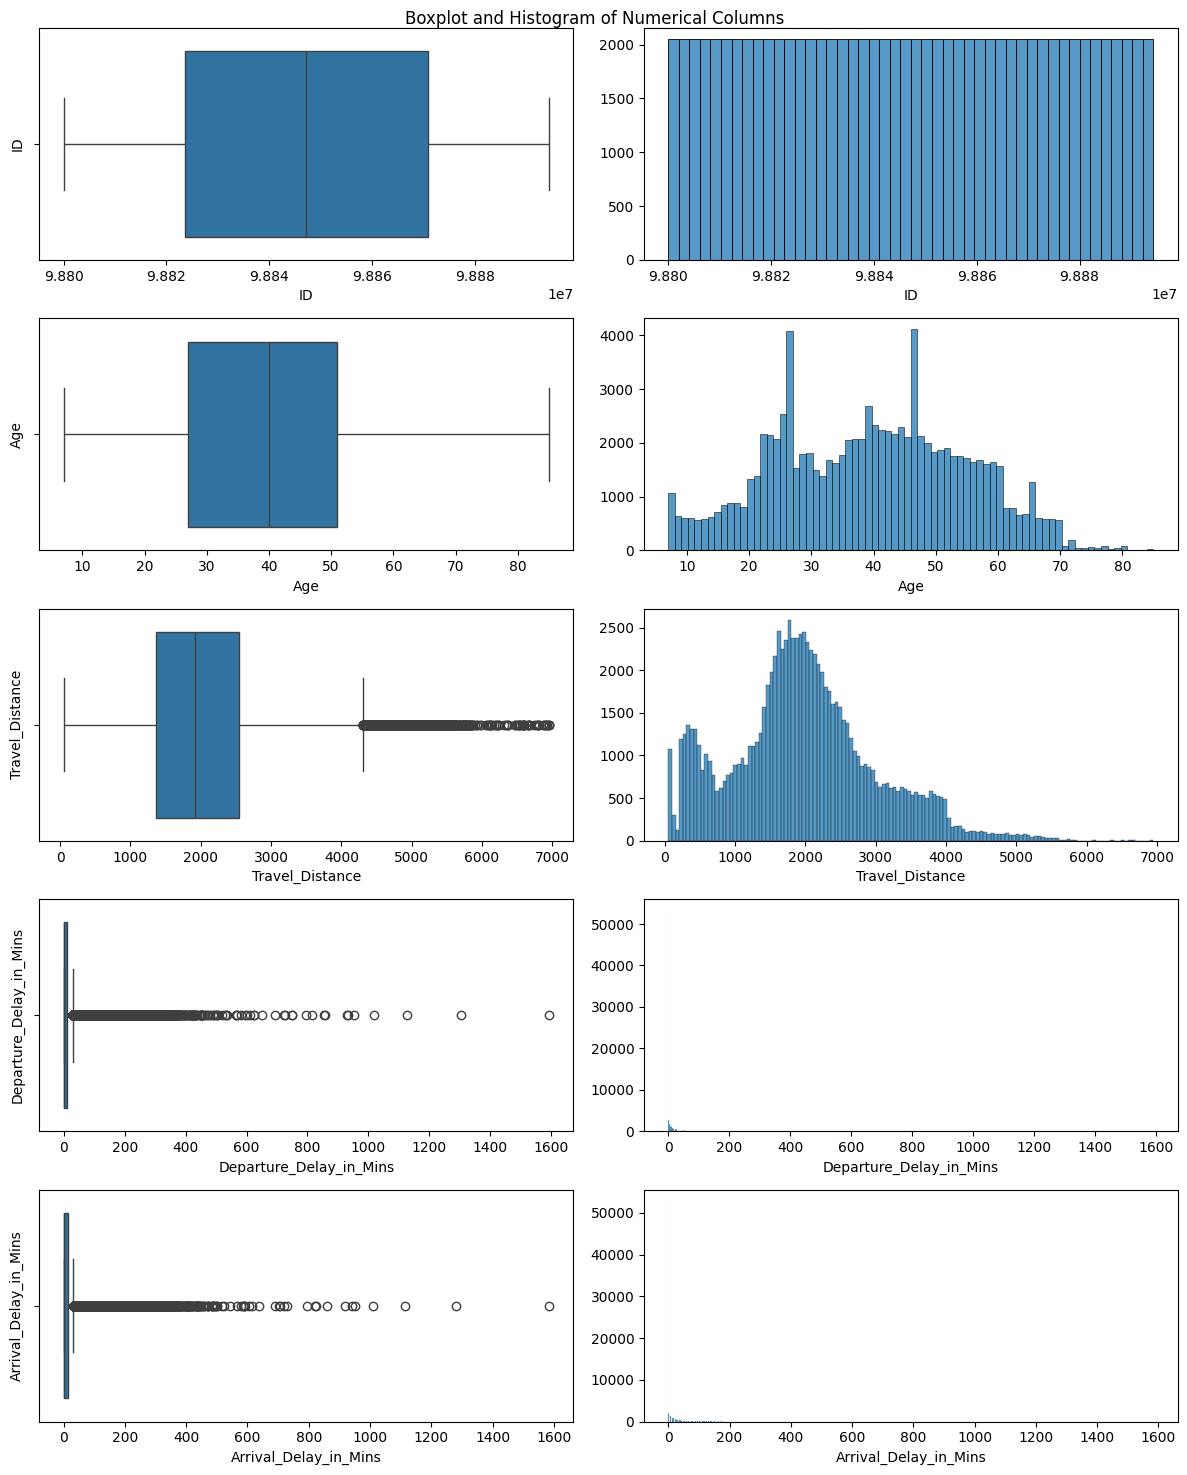

In [ ]:
# Select numerical variables, exclude 'Overall_Experience'
numerical_cols = df_train.select_dtypes(include='number')
numerical_cols.drop('Overall_Experience', axis=1, inplace=True)

# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(numerical_cols.columns), ncols=2, figsize=(12, 3 * len(numerical_cols.columns)))

# Iterate over each numerical column and create a boxplot and histogram side by side
for i, col in enumerate(numerical_cols.columns):
    # Boxplot
    ax_boxplot = sns.boxplot(x=numerical_cols[col], ax=axes[i, 0])
    ax_boxplot.set_ylabel(col)

    # Histogram
    ax_hist = sns.histplot(x=numerical_cols[col], ax=axes[i, 1])
    ax_hist.set_ylabel('')

# Set the title
plt.suptitle('Boxplot and Histogram of Numerical Columns')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the boxplot and histogram
plt.show()

In [ ]:
# Let's encode categorical variables:

# Drop
# ['ID'], ['Overall_Experience']

df_train_encoded = pd.get_dummies(df_train, columns=['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class', 'Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 'Catering', 'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding'])

In [ ]:
df_test_encoded = pd.get_dummies(df_test, columns=['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class', 'Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 'Catering', 'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding'])

In [ ]:
df_train_encoded.head()

,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Gender_Female,Gender_Male,Customer_Type_Disloyal Customer,Customer_Type_Loyal Customer,...,Cleanliness_Extremely Poor,Cleanliness_Good,Cleanliness_Needs Improvement,Cleanliness_Poor,Online_Boarding_Acceptable,Online_Boarding_Excellent,Online_Boarding_Extremely Poor,Online_Boarding_Good,Online_Boarding_Needs Improvement,Online_Boarding_Poor
0,98800001,52.0,272,0.0,5.0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1,98800002,48.0,2200,9.0,0.0,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
2,98800003,43.0,1061,77.0,119.0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,98800004,44.0,780,13.0,18.0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,98800005,50.0,1981,0.0,0.0,1,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
df_test_encoded.head()

,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Gender_Female,Gender_Male,Customer_Type_Disloyal Customer,Customer_Type_Loyal Customer,Type_Travel_Business Travel,...,Cleanliness_Excellent,Cleanliness_Good,Cleanliness_Needs Improvement,Cleanliness_Poor,Online_Boarding_Acceptable,Online_Boarding_Excellent,Online_Boarding_Extremely Poor,Online_Boarding_Good,Online_Boarding_Needs Improvement,Online_Boarding_Poor
0,99900001,36.0,532,0.0,0.0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,99900002,21.0,1425,9.0,28.0,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,0
2,99900003,60.0,2832,0.0,0.0,0,1,0,1,1,...,0,0,1,0,0,1,0,0,0,0
3,99900004,29.0,1352,0.0,0.0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,99900005,18.0,1610,17.0,0.0,0,1,1,0,1,...,1,0,0,0,0,1,0,0,0,0


In [ ]:
# Apply Simple Imputer
from sklearn.impute import SimpleImputer

# create a SimpleImputer object with strategy as 'mean'
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# apply the imputer to the DataFrame
df_train_imputed = pd.DataFrame(imputer.fit_transform(df_train_encoded), columns=df_train_encoded.columns)

In [ ]:
df_train_imputed.head()

,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Gender_Female,Gender_Male,Customer_Type_Disloyal Customer,Customer_Type_Loyal Customer,...,Cleanliness_Extremely Poor,Cleanliness_Good,Cleanliness_Needs Improvement,Cleanliness_Poor,Online_Boarding_Acceptable,Online_Boarding_Excellent,Online_Boarding_Extremely Poor,Online_Boarding_Good,Online_Boarding_Needs Improvement,Online_Boarding_Poor
0,98800001.0,52.0,272.0,0.0,5.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,98800002.0,48.0,2200.0,9.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,98800003.0,43.0,1061.0,77.0,119.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,98800004.0,44.0,780.0,13.0,18.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,98800005.0,50.0,1981.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Apply Simple Imputer
from sklearn.impute import SimpleImputer

# create a SimpleImputer object with strategy as 'mean'
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# apply the imputer to the DataFrame
df_test_imputed = pd.DataFrame(imputer.fit_transform(df_test_encoded), columns=df_test_encoded.columns)

In [ ]:
df_test_imputed.head()

,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Gender_Female,Gender_Male,Customer_Type_Disloyal Customer,Customer_Type_Loyal Customer,Type_Travel_Business Travel,...,Cleanliness_Excellent,Cleanliness_Good,Cleanliness_Needs Improvement,Cleanliness_Poor,Online_Boarding_Acceptable,Online_Boarding_Excellent,Online_Boarding_Extremely Poor,Online_Boarding_Good,Online_Boarding_Needs Improvement,Online_Boarding_Poor
0,99900001.0,36.0,532.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,99900002.0,21.0,1425.0,9.0,28.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,99900003.0,60.0,2832.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,99900004.0,29.0,1352.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,99900005.0,18.0,1610.0,17.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
columns_df_train_imputed = set(df_train_imputed.columns)
columns_df_test_imputed = set(df_test_imputed.columns)

# Find the difference between the two sets
diff_df1_df2 = columns_df_train_imputed - columns_df_test_imputed
diff_df2_df1 = columns_df_test_imputed - columns_df_train_imputed

print("Columns in df1 but not in df2: ", diff_df1_df2)
print("Columns in df2 but not in df1: ", diff_df2_df1)

Columns in df1 but not in df2:  {'CheckIn_Service_Extremely Poor', 'Onboard_Service_Extremely Poor', 'Cleanliness_Extremely Poor', 'Online_Support_Extremely Poor', 'Platform_Location_Very Inconvenient', 'Overall_Experience'}
Columns in df2 but not in df1:  set()


In [ ]:
# Dropping Columns in df1 but not in df2

In [ ]:
df_train_imputed = df_train_imputed.drop(columns=['Onboard_Service_Extremely Poor', 'Online_Support_Extremely Poor', 'Cleanliness_Extremely Poor', 'Platform_Location_Very Inconvenient', 'CheckIn_Service_Extremely Poor'])

In [ ]:
columns_df_train_imputed = set(df_train_imputed.columns)
columns_df_test_imputed = set(df_test_imputed.columns)

# Find the difference between the two sets
diff_df1_df2 = columns_df_train_imputed - columns_df_test_imputed
diff_df2_df1 = columns_df_test_imputed - columns_df_train_imputed

print("Columns in df1 but not in df2: ", diff_df1_df2)
print("Columns in df2 but not in df1: ", diff_df2_df1)

Columns in df1 but not in df2:  {'Overall_Experience'}
Columns in df2 but not in df1:  set()


In [ ]:
df_train_encoded.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,94379.0,9.884719e+07,27245.014865,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Age,94346.0,3.941965e+01,15.116632,7.0,27.0,40.0,51.0,85.0
Travel_Distance,94379.0,1.978888e+03,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,94322.0,1.464709e+01,38.138781,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94022.0,1.500522e+01,38.439409,0.0,0.0,0.0,13.0,1584.0
...,...,...,...,...,...,...,...,...
Online_Boarding_Excellent,94379.0,2.303690e-01,0.421071,0.0,0.0,0.0,0.0,1.0
Online_Boarding_Extremely Poor,94379.0,1.271469e-04,0.011275,0.0,0.0,0.0,0.0,1.0
Online_Boarding_Good,94379.0,2.705369e-01,0.444240,0.0,0.0,0.0,1.0,1.0
Online_Boarding_Needs Improvement,94379.0,1.425211e-01,0.349586,0.0,0.0,0.0,0.0,1.0


**Observations:**

- Both `website_visits` and `page_views_per_visit` contain outliers, it is not uncommon for visitors to return a significant number of times before commiting to a subscription, alwo browsing around the site trying to find out information or relevant courses to enroll is an indicator of engagement.

**Note:** Given the above reasoning, we will leave these outliers untreated as these may provide insight into the reasoning for paid membership `status`

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [ ]:
# # Defining the hist_box() function
def hist_box(col):
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(12,8))
  sns.set(style='darkgrid')
  # Adding a graph in each part
  sns.boxplot(df_train_encoded[col], ax=ax_box, showmeans=True, orient='h')
  sns.histplot(df_train_encoded[col], ax=ax_hist)
  ax_hist.axvline(df_train_encoded[col].mean(), color='green', linestyle='--') # Green line corresponds to the mean in the plot
  ax_hist.axvline(df_train_encoded[col].median(), color='orange', linestyle='-') # Orange line corresponds to the median in the plot
  plt.show()

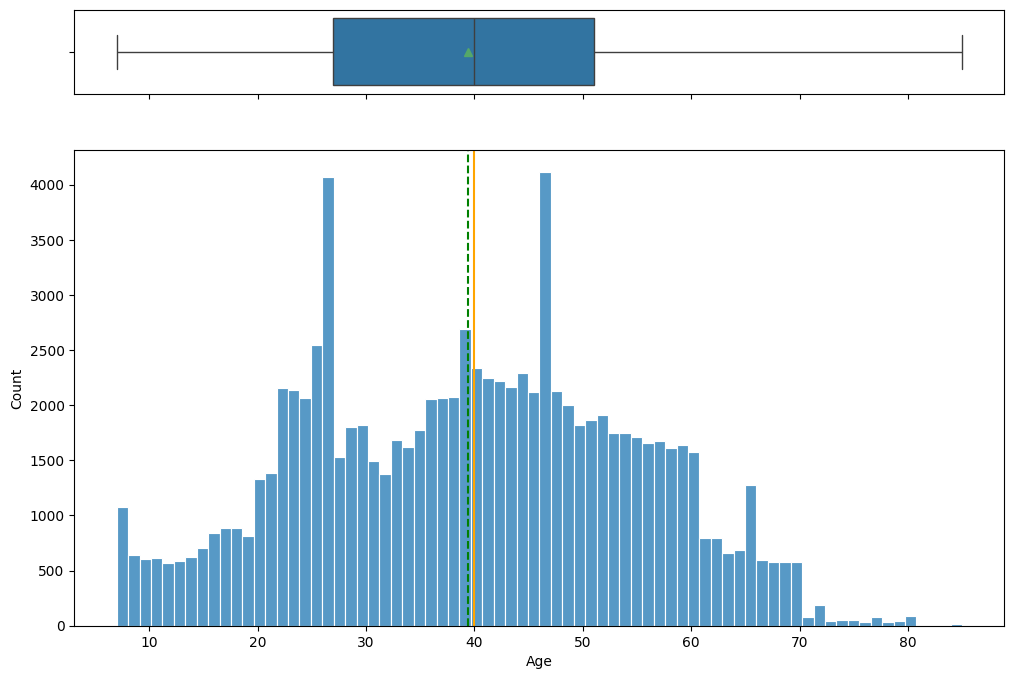

In [ ]:
hist_box('Age')

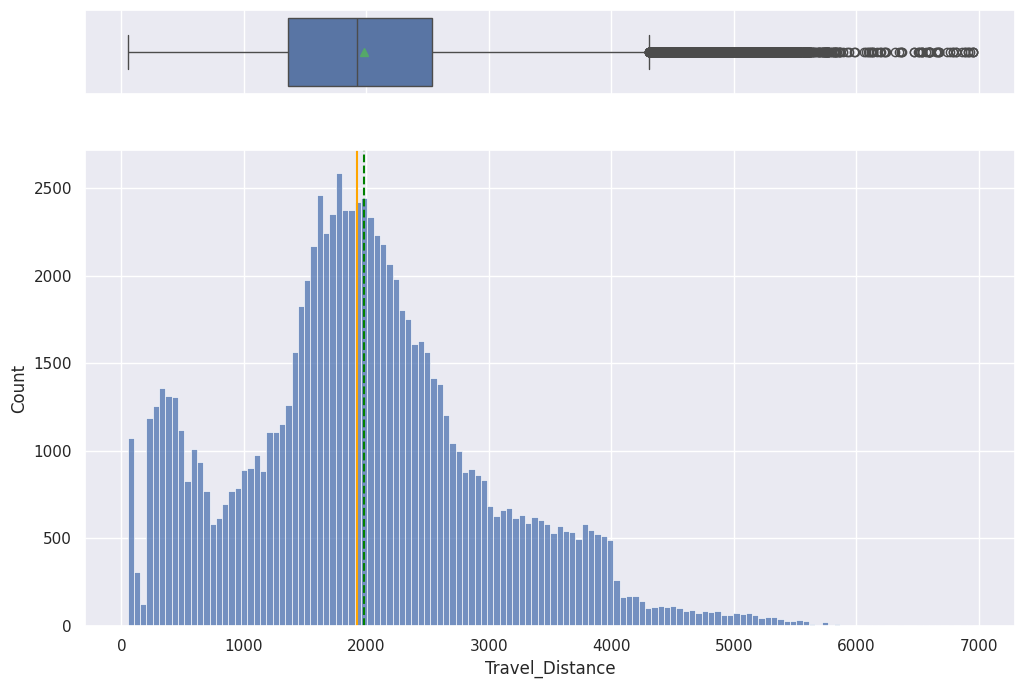

In [ ]:
hist_box('Travel_Distance')

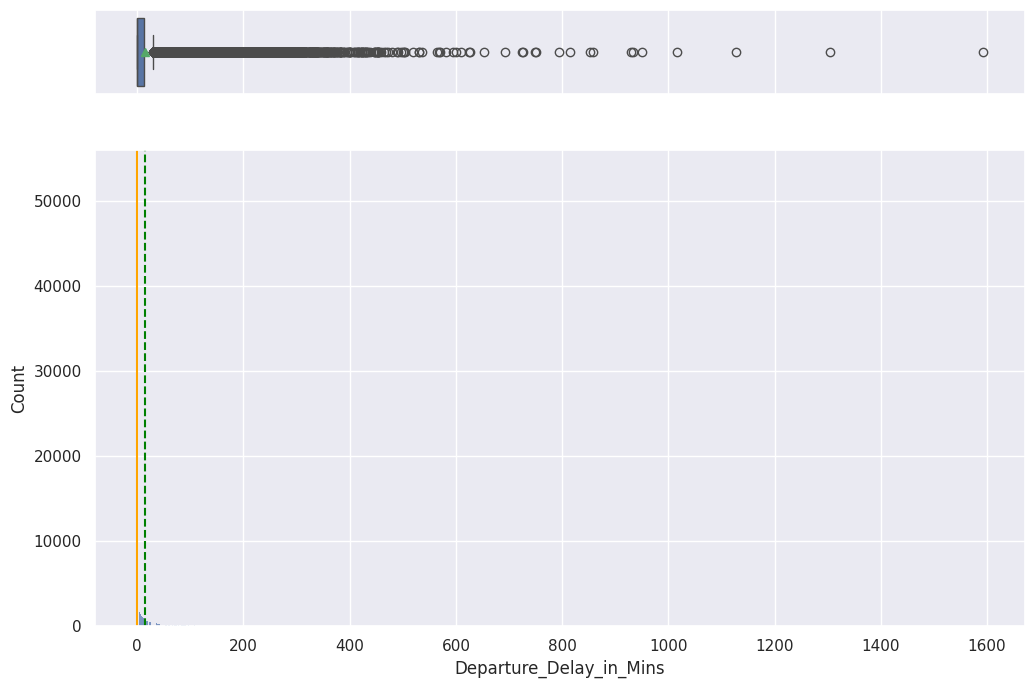

In [ ]:
hist_box('Departure_Delay_in_Mins')

In [ ]:
# # Defining the hist_box() function
def hist_box_imp(col):
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(12,8))
  sns.set(style='darkgrid')
  # Adding a graph in each part
  sns.boxplot(df_train_imputed[col], ax=ax_box, showmeans=True, orient='h')
  sns.histplot(df_train_imputed[col], ax=ax_hist)
  ax_hist.axvline(df_train_imputed[col].mean(), color='green', linestyle='--') # Green line corresponds to the mean in the plot
  ax_hist.axvline(df_train_imputed[col].median(), color='orange', linestyle='-') # Orange line corresponds to the median in the plot
  plt.show()

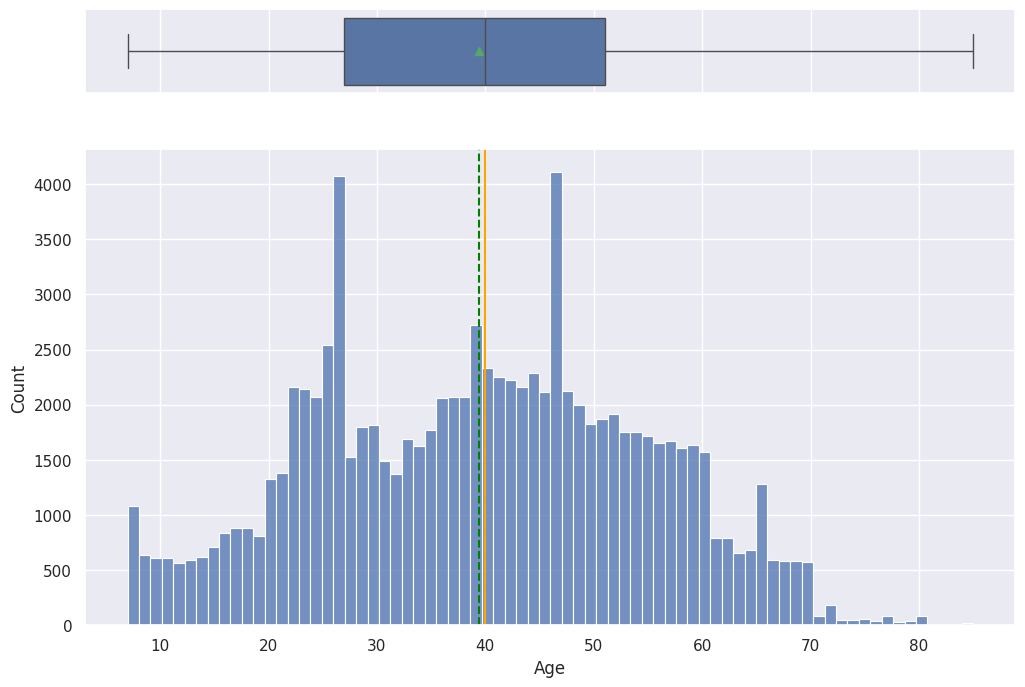

In [ ]:
hist_box_imp('Age')

## Building a Decision Tree model

In [ ]:
df_train_imputed.head()

,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Gender_Female,Gender_Male,Customer_Type_Disloyal Customer,Customer_Type_Loyal Customer,...,Cleanliness_Excellent,Cleanliness_Good,Cleanliness_Needs Improvement,Cleanliness_Poor,Online_Boarding_Acceptable,Online_Boarding_Excellent,Online_Boarding_Extremely Poor,Online_Boarding_Good,Online_Boarding_Needs Improvement,Online_Boarding_Poor
0,98800001.0,52.0,272.0,0.0,5.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,98800002.0,48.0,2200.0,9.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,98800003.0,43.0,1061.0,77.0,119.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,98800004.0,44.0,780.0,13.0,18.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,98800005.0,50.0,1981.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df_train_imputed.drop(['ID'], axis=1, inplace=True)

In [ ]:
df_train_imputed.head()

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Gender_Female,Gender_Male,Customer_Type_Disloyal Customer,Customer_Type_Loyal Customer,Type_Travel_Business Travel,...,Cleanliness_Excellent,Cleanliness_Good,Cleanliness_Needs Improvement,Cleanliness_Poor,Online_Boarding_Acceptable,Online_Boarding_Excellent,Online_Boarding_Extremely Poor,Online_Boarding_Good,Online_Boarding_Needs Improvement,Online_Boarding_Poor
0,52.0,272.0,0.0,5.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,48.0,2200.0,9.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,43.0,1061.0,77.0,119.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,44.0,780.0,13.0,18.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,50.0,1981.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Separating target variable 'Y' from the rest 'X'
X = df_train_imputed.drop(["Overall_Experience"], axis=1)
y = df_train_imputed["Overall_Experience"]

In [ ]:
# Creating dummy variables
# X = pd.get_dummies(X, drop_first = True)

# Split 70:30 train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=3
)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (89660, 92)
Shape of test set :  (4719, 92)
Percentage of classes in training set:
1.0    0.546431
0.0    0.453569
Name: Overall_Experience, dtype: float64
Percentage of classes in test set:
1.0    0.550964
0.0    0.449036
Name: Overall_Experience, dtype: float64


## **Model evaluation criterion:**

#### **The model can make wrong predictions as:**
1. Predicting a lead will not become a paid customer - member becomes a paid customer. - False Negative (FN)
2. Predicting a lead will become a paid member - member does not become a paid customer. - False Positive (FP)

## Evaluation Criteria:

**Accuracy Score:** The evaluation metric is simply the percentage of predictions made by the model that turned out to be correct. This is also called the accuracy of the model. It will be calculated as the total number of correct predictions (True Positives + True Negatives) divided by the total number of observations in the dataset.

In other words, the best possible accuracy is **100%** (or 1), and the worst possible accuracy 0%.

In [ ]:
# Creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(6,4))

    sns.heatmap(cm, annot=True,  fmt='.2f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## Building a Decision tree

In [ ]:
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Do we need to prune the tree?

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38521
         1.0       1.00      1.00      1.00     46420

    accuracy                           1.00     84941
   macro avg       1.00      1.00      1.00     84941
weighted avg       1.00      1.00      1.00     84941



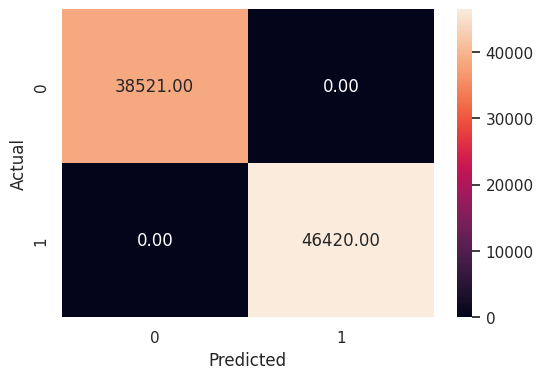

In [ ]:
 # Checking performance on the training dataset
pred_train_dt = model_dt.predict(X_train)
metrics_score(y_train, pred_train_dt)

**Write your Answer here :**

* 0 errors on the training set, each sample has been classified correctly.
* Model has performed very well on the training set.
* Let's check the performance on test data to see if the model is overfitting.

              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92      4265
         1.0       0.93      0.93      0.93      5173

    accuracy                           0.92      9438
   macro avg       0.92      0.92      0.92      9438
weighted avg       0.92      0.92      0.92      9438



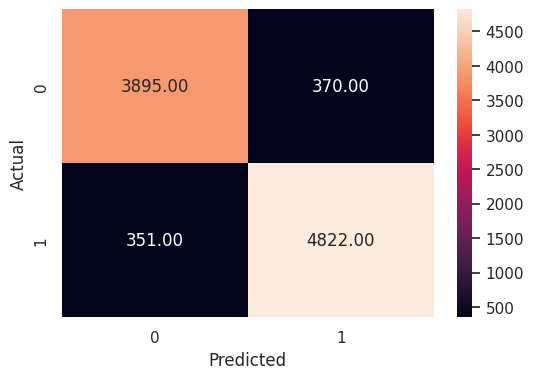

In [ ]:
pred_test_dt = model_dt.predict(X_test)
dt_score = metrics_score(y_test, pred_test_dt)

**Observations:**

- The Decision Tree works well on the training data but **not that well on the test data** as the recall is 0.86 in comparison to 1 for the training dataset, i.e., the Decision Tree is overfitting the training data and will not generalize well.

- The precision on the test data shows an 87% chance that the model will predict that a person is not going to become a paid member when it actually it will not.

- The next step to achieve our objective of increasing **recall** should be to optimise the Decision Tree.

### Optimising the Decision Tree

To optimise the decision tree we have opted to apply the below hyperparameters, in this case we are using grid search cross-validation.

We are going to leverage the parameters in the dictionary `parameters`

- max_depth: This should help reduce overfitting by limiting the tree depth.
- max_leaf_nodes:  This parameter should help in reducing complexity
- min_samples_split:  This parameter should help reducing the number of samples to split.

We perform an exhaustive search over the specified hyperparameter values. The estimator parameter is set to the decision tree classifier object.

In [ ]:
# # Choose the type of classifier.
# estimator = DecisionTreeClassifier(random_state=1)

# # Grid of parameters to choose from
# parameters = {
#     "max_depth": np.arange(1,100,5),
#     "max_leaf_nodes": [50, 75, 150],
#     "min_samples_split": [10, 30, 50],
# }
# # Run the grid search
# grid_obj = GridSearchCV(estimator, parameters, cv=3,scoring='accuracy',n_jobs=-1)
# grid_obj = grid_obj.fit(X_train, y_train)

# # Set the clf to the best combination of parameters
# estimator = grid_obj.best_estimator_

# # Fit the best algorithm to the data.
# estimator.fit(X_train, y_train)

KeyboardInterrupt: 

DecisionTreeClassifier()

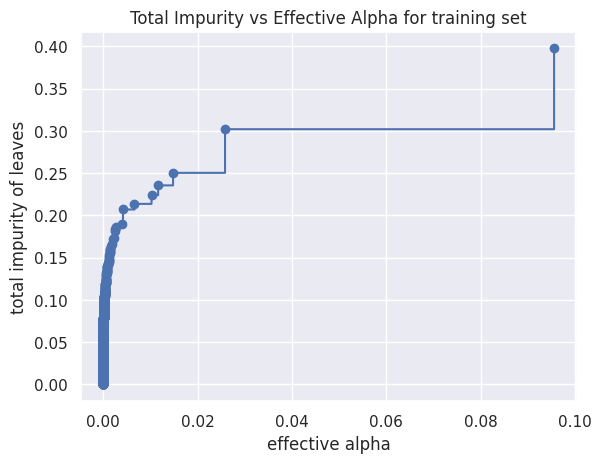

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Construct the decision tree
clf = DecisionTreeClassifier(ccp_alpha=optimal_ccp_alpha)
clf.fit(X_train, y_train)

# Compute the cost-complexity pruning path
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Plot the pruning path
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs Effective Alpha for training set")

# Find the optimal value for ccp_alpha
optimal_ccp_alpha = ccp_alphas[np.argmin(impurities)]

# Set the ccp_alpha parameter
# clf.set_ccp_alpha(optimal_ccp_alpha)

# Re-fit the tree
clf.fit(X_train, y_train)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38521
         1.0       1.00      1.00      1.00     46420

    accuracy                           1.00     84941
   macro avg       1.00      1.00      1.00     84941
weighted avg       1.00      1.00      1.00     84941



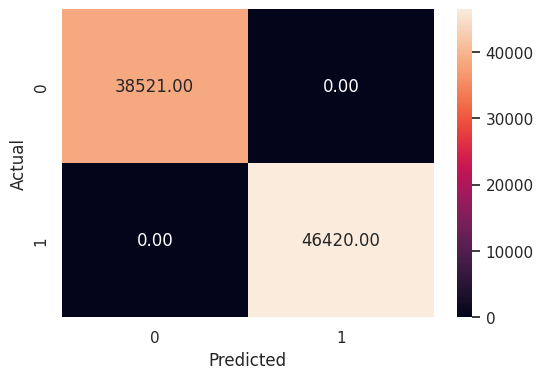

In [ ]:
# Checking performance on the training dataset
dt_tuned = clf.predict(X_train)
dt_tuned_score = metrics_score(y_train,dt_tuned)

In [ ]:
# # Checking performance on the training dataset
# dt_tuned = estimator.predict(X_train)
# dt_tuned_score = metrics_score(y_train,dt_tuned)

**Observations:**
- `recall` on the training data has dropped to 94%, precision has also dropped to 92%, this is an indicator that our tunning worked and overfitting should have reduced.

- We now need to run the model again on the test dataset to verify performance.

In [ ]:
# Checking performance on the test dataset
# y_pred_tuned = estimator.predict(X_test)
# metrics_score(y_test,y_pred_tuned)

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92      4265
         1.0       0.93      0.93      0.93      5173

    accuracy                           0.93      9438
   macro avg       0.93      0.93      0.93      9438
weighted avg       0.93      0.93      0.93      9438



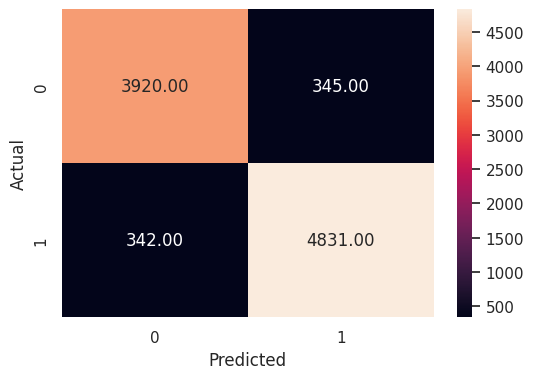

In [ ]:
y_pred_tuned = clf.predict(X_test)
metrics_score(y_test,y_pred_tuned)

# Gradient Boosting

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100],
    'max_depth': [10, 12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(best_params)

# Fit the model with the best parameters
model = GradientBoostingClassifier(**best_params)
model.fit(X_train, y_train)

# Predict and calculate accuracy
predict_train = model.predict(X_train)
accuracy_train = accuracy_score(y_train, predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=101,max_depth=12)

# fit the model with the training data
model.fit(X_train,y_train)

# predict the target on the train dataset
predict_train = model.predict(X_train)
print('\nTarget on train data',predict_train)

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)


Target on train data [1. 0. 0. ... 1. 1. 0.]

accuracy_score on train dataset :  0.9996207896497881


In [ ]:
# predict the target on the test dataset
predict_test = model.predict(X_test)
print('\nTarget on train data',predict_test)

# Accuray Score on train dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('\naccuracy_score on train dataset : ', accuracy_test)


Target on train data [0. 0. 0. ... 0. 0. 1.]

accuracy_score on train dataset :  0.9493536766264039


In [ ]:
# Applying the model

predictions_gb = model.predict(df_test_imputed_noid)

In [ ]:
len(predictions_gb)

35602

In [ ]:
# Retrieve column 'ID' from df_test_imputed
id_column = df_test_imputed['ID'].astype(int)

# Convert predictions_rf to a DataFrame
predictions_rf_gb = pd.DataFrame(predictions_gb, columns=['Overall_Experience'])

# Concatenate the 'ID' column with the predictions
result = pd.concat([id_column, predictions_rf_gb], axis=1)

In [ ]:
result.to_csv('output_gb_101-12.csv', index=False)

In [ ]:
print('output.csv')

output.csv


In [ ]:
from google.colab import files

files.download('output_gb_101-12.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Observations:**

- Results are encouraging as we get a recall performance of 91% up 5 percentage points on test data when compared to the default model.

- Precision of this DT tuned model has increased one point to 88% which is also a good indicator.

- DT Tuned model provides a generalised performance with more balanced precision and recall values.

- We are getting closer to our goal of reducing False Negatives

### Visualising the DT

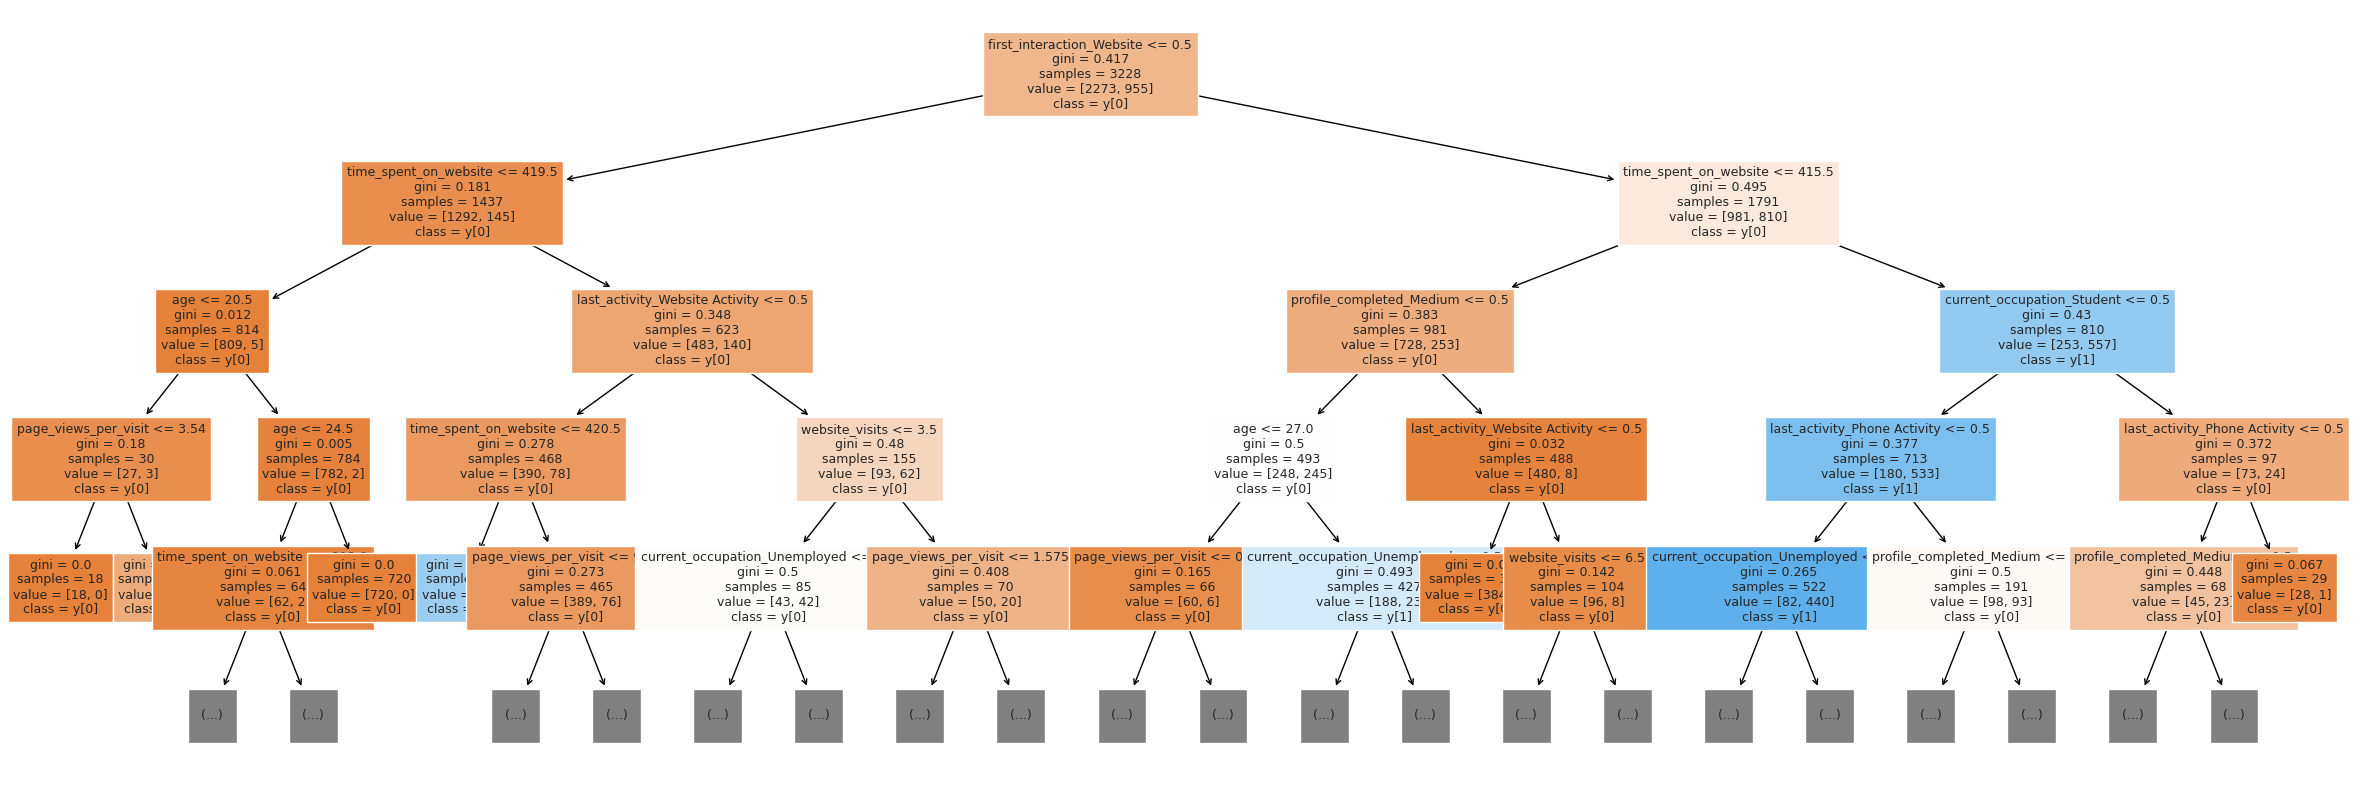

In [ ]:
# Code below will help us visualise the decision tree.
feature_names = list(X_train.columns)
plt.figure(figsize=(30, 10))
out = tree.plot_tree(
    estimator,
    max_depth=4,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=True,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

**Observations:**

- Blue leaves **y[1]** represent represent leads converted to paid membership, **y[0]** represent leads that do not convert. Also, the darker shade represents observation count in the leaf.

- The DT splits on `fist_interaction_website` first, after this split `time_spent_on_website` is taken into account followed by `profile_completed_Medium` to make the decision on weather the lead will convert convert to paid customer or not.

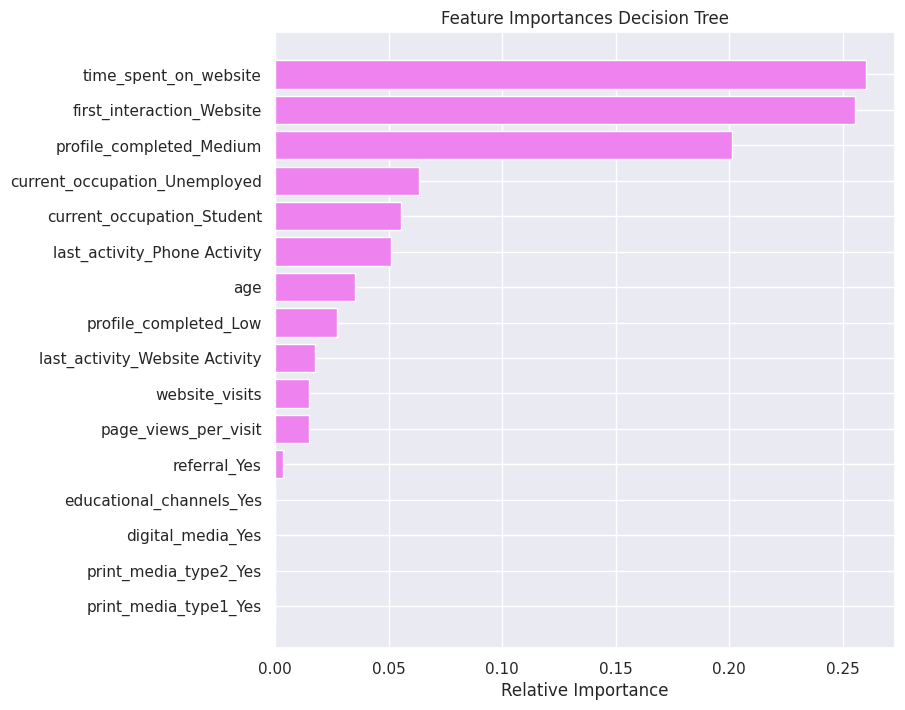

In [ ]:
# Importance of features in the tree building
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances Decision Tree")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**

Our top 3 features in accordance to our feature importance chart above are:

- `time_spent_on_website` which makes sense as this is an indicator of engagement, given the likelihood of potential leads to spend time browsing around the course catalogue, making enquires and interacting via website channel to find an potentially enroll as a paid member.

- `First_interaction_website` meaning our leads are more likely to originate from the website channel.

- `Profile_completed_Medium` is another important feature, meaning a 50% completion rate is a strong indicator of a potential lead becomming paid member.

## Building a Random Forest model

- We will leverage random forest expecting to get a prediction improvement, **Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample, a decision tree makes a prediction.

- The results from all the **decision trees** are combined and the final prediction is made using **voting** (for classification problems) or **averaging** (for regression problems).

- We should be able to take a look at performance on training and test data, feature importance and other characteristics to help us drive some conclusions and recommendations for ExtraaLearn


In [ ]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.3, 1: 0.7}, random_state = 42)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=42)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29993
         1.0       1.00      1.00      1.00     36072

    accuracy                           1.00     66065
   macro avg       1.00      1.00      1.00     66065
weighted avg       1.00      1.00      1.00     66065



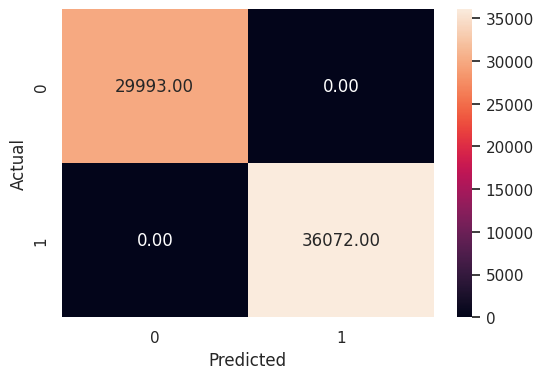

In [ ]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

**Observations:**

- This model is likely to overfit as with the default decision tree both precision and recall metrics are 100% which means a perfect fit on the training data.

- Next step is to execute this model on the test data and check how is it performing.

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95     12793
         1.0       0.96      0.94      0.95     15521

    accuracy                           0.95     28314
   macro avg       0.95      0.95      0.95     28314
weighted avg       0.95      0.95      0.95     28314



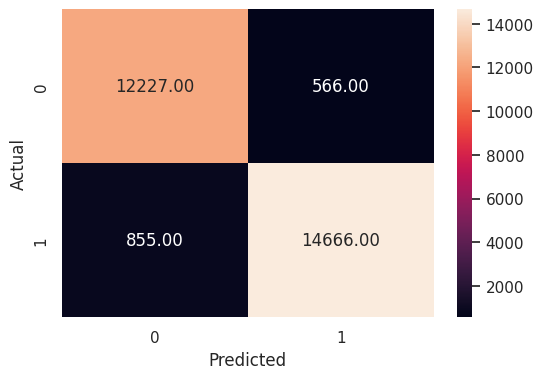

In [ ]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

In [ ]:
df_test_imputed_noid = df_test_imputed.drop(columns=['ID'])

In [ ]:
df_test_imputed.head()

,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Gender_Female,Gender_Male,Customer_Type_Disloyal Customer,Customer_Type_Loyal Customer,Type_Travel_Business Travel,...,Cleanliness_Excellent,Cleanliness_Good,Cleanliness_Needs Improvement,Cleanliness_Poor,Online_Boarding_Acceptable,Online_Boarding_Excellent,Online_Boarding_Extremely Poor,Online_Boarding_Good,Online_Boarding_Needs Improvement,Online_Boarding_Poor
0,99900001.0,36.0,532.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,99900002.0,21.0,1425.0,9.0,28.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,99900003.0,60.0,2832.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,99900004.0,29.0,1352.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,99900005.0,18.0,1610.0,17.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# Applying the model

predictions_rf = rf_estimator.predict(df_test_imputed_noid)

In [ ]:
len(predictions_rf)

35602

In [ ]:
# Retrieve column 'ID' from df_test_imputed
id_column = df_test_imputed['ID'].astype(int)

# Convert predictions_rf to a DataFrame
predictions_rf_df = pd.DataFrame(predictions_rf, columns=['Overall_Experience'])

# Concatenate the 'ID' column with the predictions
result = pd.concat([id_column, predictions_rf_df], axis=1)

In [ ]:
result.to_csv('output.csv', index=False)

In [ ]:
print('output.csv')

output.csv


In [ ]:
from google.colab import files

files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Observations:**

- Our objective is to improve `recall` for the 0 category, random forest improves recall performance by 2 percentage points when compared to the optimised decision tree before.

- On the precision side the random forest loses 1% point peformance.

### Visualising the Random Forest Classifier

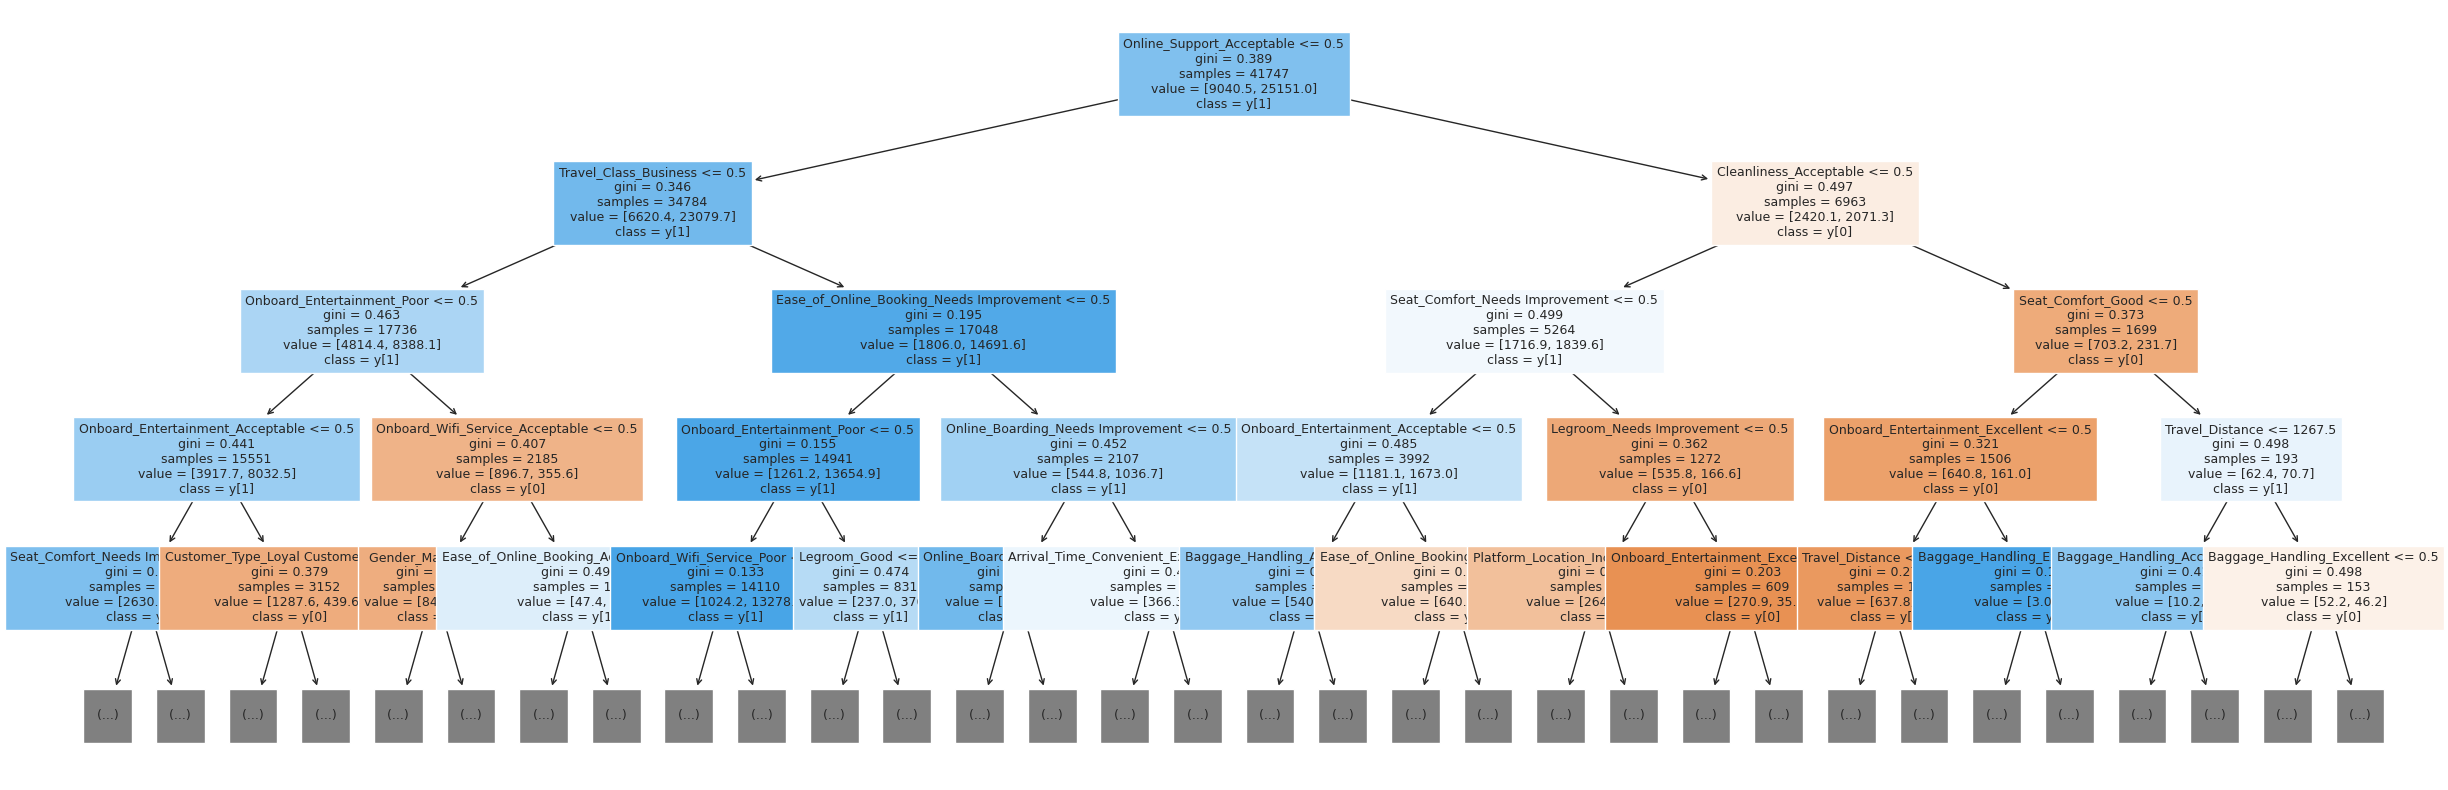

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Based on the previously trained random forest classifier called 'rf_classifier'
feature_names = list(X_train.columns)

# Get the first decision tree from the random forest
tree_estimator = rf_estimator.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(30, 10))
tree.plot_tree(
    tree_estimator,
    feature_names=feature_names,
    max_depth=4,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=True,
)

plt.show()

**Observations:**

- Initial split is done on `profile_completed_low`, then on `time_spent_on_website` and `website_visits`.

<Axes: title={'center': 'Feature Importance Random Forest'}, xlabel='Importance', ylabel='None'>

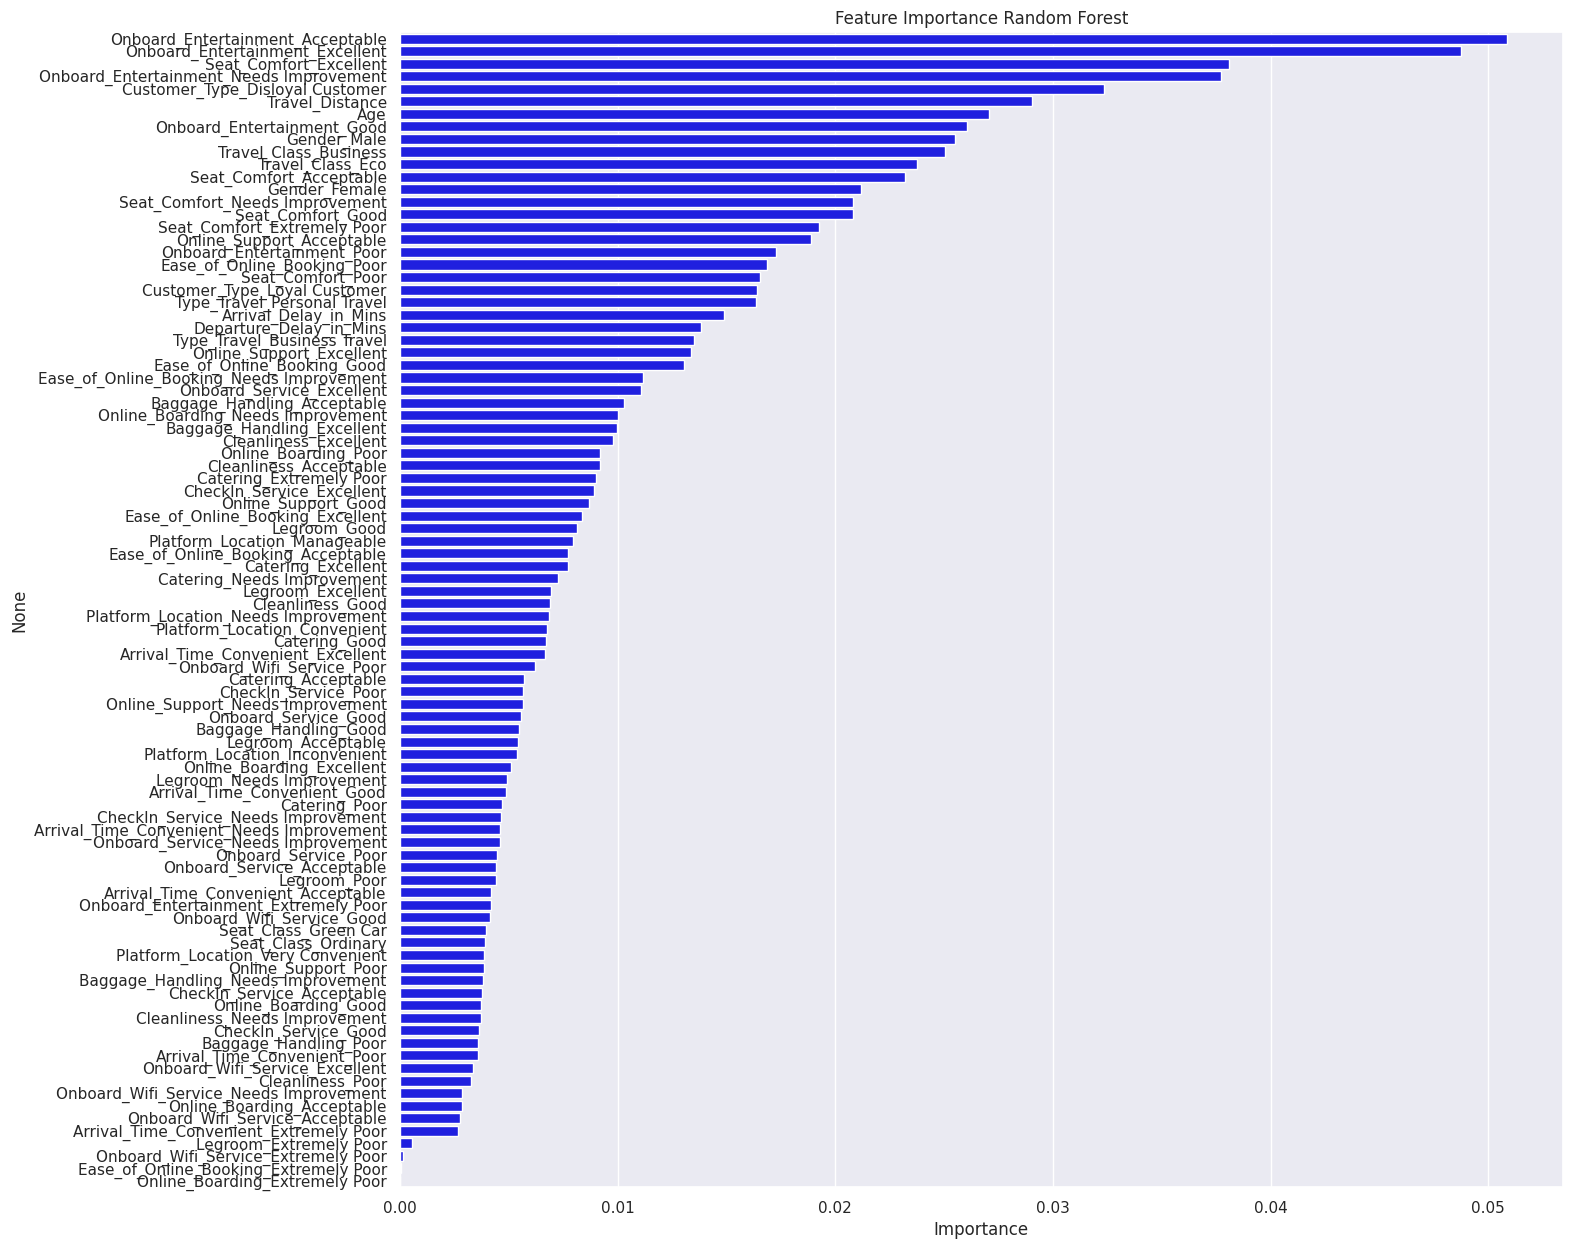

In [ ]:
# We can check imporances in the random forest estimator

importances = rf_estimator.feature_importances_

columns = X_train.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)


plt.figure(figsize=(15, 15))
plt.title("Feature Importance Random Forest")
sns.barplot(x = importance_df.Importance, y = importance_df.index, color="blue")

**Observations:**

- The Random Forest  verifies the results from the decision tree that the most important features are `time_spent_on_website`, `first_interaction_website`, `profile_completed_medium` and includes `page_views_per_visit` which is expected as longer visits are expected to generated a larger page view count.
- We can say that the leads that spend more time on the website are more likely to become paid members, we can also highlight the importance of the website channel in lead generation.
- Other features such as lead's Age group and profile completion 50-75% are important contributors as well.
- We know the default RF overfits as it's performance on the training data is perfect, so it won't be good at generalizing, so we must now tune this classifier and observe its performance.

### Random Forest Classifier Tunning

To tune the classifier we leverage the class_weight parameter set to {0: 0.3, 1: 0.7}. This assigns a higher weight to class 1 (30%) compared to class 0 (70%) to address the class imbalance issue.

We propose tunning by making use of below hyperparameters in dictionary `params_rf`:

- `n_estimators` or number of trees in the forest
- `min_samples_leaf` to define min number of samples to qualify as a leaf node
- `max_features` max number of features to consider for splitting optimisation

We use the `make_scorer` to calculate the recall for class 0.

The `GridSearchCV` object is created with the Random Forest classifier, the hyperparameter grid (`params_rf`), the scorer, and 5-fold cross-validation (`cv=5`). This will perform an exhaustive search over the hyperparameter grid to find the best combination of hyperparameters that maximizes the recall score for class 0.




In [ ]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.3, 1: 0.7}, random_state = 1)

# Grid of parameters to choose from
params_rf = {
    'n_estimators': [100, 200, 300, 500],
    # 'max_depth': [None, 5, 10, 15],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}


# Type of scoring used to compare parameter combinations - recall score for class 0
scorer = metrics.make_scorer(accuracy_score)

# Run the grid search in order to optimise recall for class 0
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 3)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

NameError: name 'RandomForestClassifier' is not defined

In [ ]:
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, max_features=0.3,
                       n_estimators=500, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



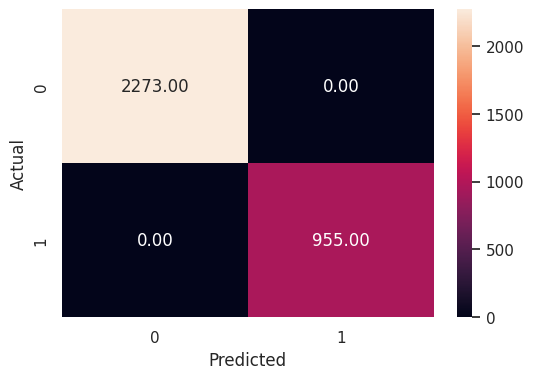

In [ ]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       962
           1       0.80      0.68      0.74       422

    accuracy                           0.85      1384
   macro avg       0.83      0.80      0.82      1384
weighted avg       0.85      0.85      0.85      1384



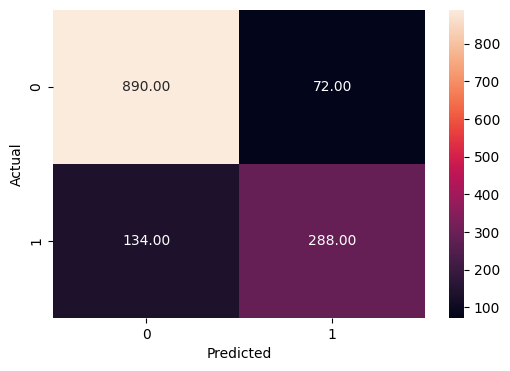

In [ ]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_rf_tuned)

<Axes: title={'center': 'Feature Importances'}, xlabel='Importance'>

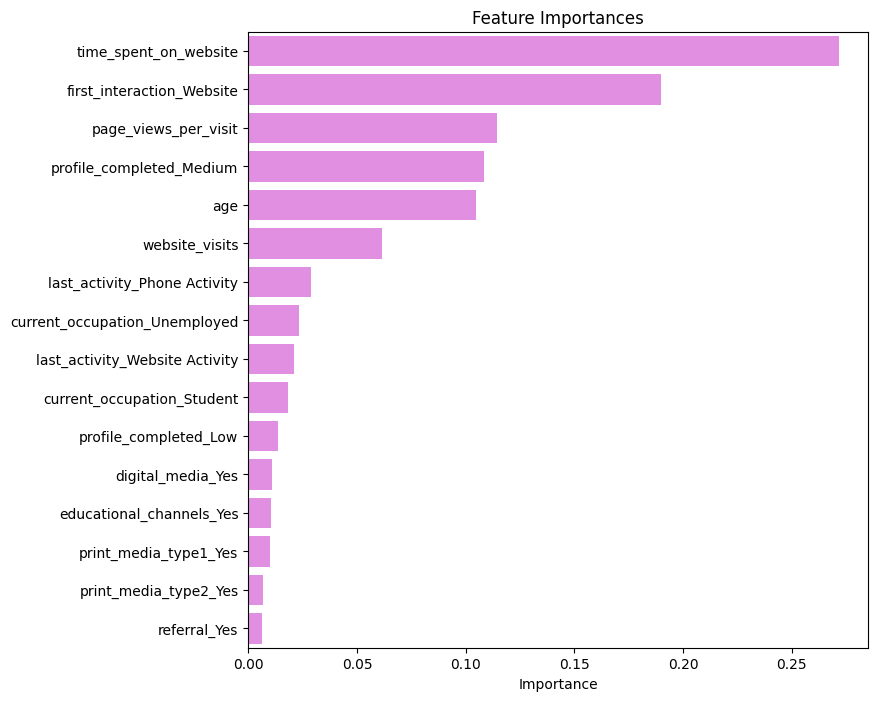

In [ ]:
# We can check imporances in the random forest estimator

importances = rf_estimator_tuned.feature_importances_

columns = X_train.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)


plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
sns.barplot(x = importance_df.Importance, y = importance_df.index, color="violet")

# REMOVING LEAST IMPORTANT FEATURES

In [ ]:
# We'll remove importance features that have an Importance factor < 0.01
filtered_df = importance_df[importance_df['Importance'] < 0.01]
print(filtered_df)

NameError: name 'importance_df' is not defined

In [ ]:
columns_to_drop = filtered_df.iloc[:, 0].values
X_train_lean = X_train.drop(columns=columns_to_drop)
X_test_lean = X_test.drop(columns=columns_to_drop)
df_test_imputed_noid_lean = df_test_imputed_noid.drop(columns=columns_to_drop)

In [ ]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.3, 1: 0.7}, random_state = 42)

rf_estimator.fit(X_train_lean, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=42)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29993
         1.0       1.00      1.00      1.00     36072

    accuracy                           1.00     66065
   macro avg       1.00      1.00      1.00     66065
weighted avg       1.00      1.00      1.00     66065



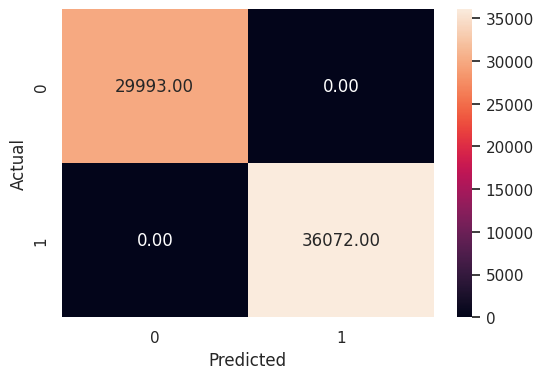

In [ ]:
# Checking performance on the training data
y_pred_train_rf_lean = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf_lean)

**Observations:**

- This model is likely to overfit as with the default decision tree both precision and recall metrics are 100% which means a perfect fit on the training data.

- Next step is to execute this model on the test data and check how is it performing.

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95     12793
         1.0       0.96      0.94      0.95     15521

    accuracy                           0.95     28314
   macro avg       0.95      0.95      0.95     28314
weighted avg       0.95      0.95      0.95     28314



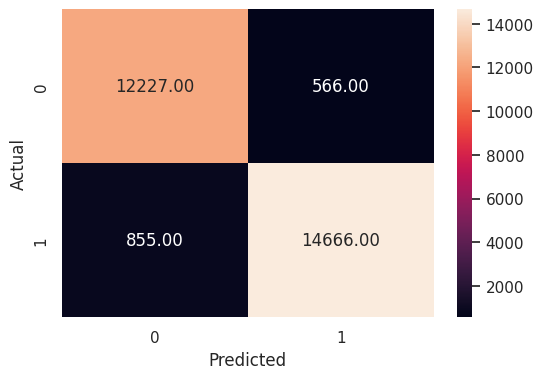

In [ ]:
# Checking performance on the testing data
y_pred_test_rf_lean = rf_estimator.predict(X_test_lean)

metrics_score(y_test, y_pred_test_rf_lean)

In [ ]:
df_test_imputed_noid = df_test_imputed.drop(columns=['ID'])

In [ ]:
df_test_imputed.head()

,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Gender_Female,Gender_Male,Customer_Type_Disloyal Customer,Customer_Type_Loyal Customer,Type_Travel_Business Travel,...,Cleanliness_Excellent,Cleanliness_Good,Cleanliness_Needs Improvement,Cleanliness_Poor,Online_Boarding_Acceptable,Online_Boarding_Excellent,Online_Boarding_Extremely Poor,Online_Boarding_Good,Online_Boarding_Needs Improvement,Online_Boarding_Poor
0,99900001.0,36.0,532.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,99900002.0,21.0,1425.0,9.0,28.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,99900003.0,60.0,2832.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,99900004.0,29.0,1352.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,99900005.0,18.0,1610.0,17.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# Applying the model

predictions_rf = rf_estimator.predict(df_test_imputed_noid)

In [ ]:
len(predictions_rf)

35602

In [ ]:
# Retrieve column 'ID' from df_test_imputed
id_column = df_test_imputed['ID'].astype(int)

# Convert predictions_rf to a DataFrame
predictions_rf_df = pd.DataFrame(predictions_rf, columns=['Overall_Experience'])

# Concatenate the 'ID' column with the predictions
result = pd.concat([id_column, predictions_rf_df], axis=1)

In [ ]:
result.to_csv('output.csv', index=False)

In [ ]:
print('output.csv')

output.csv


In [ ]:
from google.colab import files

files.download('output.csv')

FileNotFoundError: Cannot find file: output.csv

**Observations:**

- Similar to the decision tree model, `time spent on website`, `first_interaction_website`, `page_views_per_visit`, `profile_completed_Medium`, and `age` are the top five features by importance, that help us predicting on wether a customer will be converted or not.

## Actionable Insights and Recommendations

#### **Algorithmic Insights**

- Our previous exploration hightlights the power of decision trees in solving this particular classification problem for Extraalearn
- We explored Decision Trees which are simple to understand and explain, as **they mirror the human pattern of if-then-else decision making.**, Random Forest are harder to explain due to their nature but can achieve better performance.
- We applied optimisation techniques aid in improving performance for both random forest and decision tree models and compared the resuts.
  -  When tunning DT, we leveraged hyperparameters:  
    - `max_depth`: This should help reduce overfitting by limiting the tree depth.
    - `max_leaf_nodes`:  This parameter should help in reducing complexity
    - `min_samples_split`:  To reduce the number of samples to split.

  -  When tunning RF, we leveraged hyperparameters:
    - `n_estimators` or number of trees in the forest
    - `min_samples_leaf` to define min number of samples to qualify as a leaf node
    - `max_features` max number of features to consider for splitting optimisation

#### **Dataset Insights**

###### **Importance:**

- From a dataset perspective, we can conclude that `time_spent_on_website` is our leading variable followed by `first_interaction_website` from an importance point of view.  Both DT (Decision Tree) and RF (Random Forest) importance results list these variables as the most important.

- `time_spent_on_website` is an indicator of engagement which makes sense in the context of this particular business case, high engagement should be a good correlation to lead conversion, a lead may spend more time researching different options, and perhaps reading the context or watching preview videos before deciding to sign up as a paid member so this is an important feature to watch.

-  Decision Trees give importance to additional features such as `page_views_per_visit` which is an indicator of lead engagement depth, `current_ocupation_unemployed` and `current_occupation_student` which tell about occupation being determining factors in paid subscriber.

- Random Forest also give importance to other features such as `page_views_per_visit` which indicates lead's engagement depth, so this feature is important for both DT and RF but placed on a different weight, also `profile_completed_medium` and `age` are important to classify between paid and non paid members.

- We are focussing on recall for `status` `0` to reduce the likelihood for the model to produce False Negative results because this will inherently cause Extraalearn to lose a potential source of income as the customer maybe discarded and not targetted by lead conversion technologies, contrary to **precision** which focuses on the performance for False Positives, hence Extraalearn wants ***Recall*** to be maximized, the greater the Recall lesser the chances of False Negatives.

- Our objective was to avoid predicting the lead will not become a paid customer i.e. losing on a potential source of income for the company because that customer will not be targeted by the marketing team when he should be targeted. To achieve this our model has been optimised for highest possible Recall on the `status` `0` category, the greater the Recall lesser the chances of False Negatives.

    - The non tuned decision tree achieves an initial 87% precision and 86% recall, performing quite poorly on the test data, after optimising hyperparameters we manage to achieve a recall performance of 91% with a Precision of 88 for the 0 category from the tuned model.
    
    - The random forest version of the classifier achieves a  87% Precision and 93% recall for the 0 variable without any tunning applied, after applying tunning we did not get any further improvement in Precsion or Recall for the 0 variable which indicates the default model performs well enough.

## Recommendation

-  Although Random Forests and Boosting methods are more advanced, they are computationally more expensive and harder to explain to the leadership team, **the 91% recall performance from the Decision Tree Optimized means this model will be our recommendation**, this model is expected to provide better generalisation for Extraalearn going forward, F1-score for DT Optimized is 90% which represents the balanced measure for precision and recall, and it is exactly the same provided by Random Forest so the overal performance of this simpler DT model is comparable to the more advanced Random Forest.

- The prediction algoritm recommended above can help Extraalearn with early identification of leads that have a high likelihood of converting to **paid membership**, but it is recommended to keep re-training and evaluating the peformance of this model moving forward to ensure the model performance remains satisfactory.

- There's potential to leverage a more complex model such as RF in the future, furter work to improve generalisation of performance is required as both the default and tuned versions explored overfit on training data when compared to test data.

- Extraalearn's website is a critical tool in lead conversion and customer acquisition, as such additional information can be harvested to aid in early identification and conversion, it is worthwhile to enrich the dataset with additional information such as:

 - Traffic sources and SEO strategies, referral traffic patterns for partnerships and collaborations.

 - Effectiveness of lead magnets such as free courses or ebooks.

 - Social media engagement such as likes, shares.

 - CLV Customer lifetime value to identify strategies to improve revenue from individual customers over time.

- We recommend Extraalearn to implement website time tracking feature to improve lead acquisition, website analytics tools can help tracking individual lead `time_spent_on_website`, but also keeping track of the customer's interests, potential questions and website browsing patterns to help drive conversion rates by proactively engaging via tools such as personalised chat, looking at bundling products and offers tailored to the customer needs and attending to their enquires on a timely manner could all make a potential lead close more efficiently.
